---
<div align="center">

# ML2 | Urban Sound Classification
</div>

---

<div align="center">
    
---
## Problem Formulation
---

</div>

### Context

Sound Classification is considered one of the most important tasks in the field of deep learning. It has great impact on applications of voice recognition within virtual assistants (Like Siri or Alexa), customer service as well as in music and media content recommendation systems.  Moreover, it also impacts the Medical field wheteher to detect abnormalities in heartbeats or repiratory sounds.In addition  it is also used within Security and Surveillance systems to help detect and assess a possible security breach inside a home whether it is infered by distress calls or even gunshots and glass breaking. Therefore, we aim to develop deep learning algorithms that can enable us to properly classify some environmental sounds provided by the UrbanSound8k Dataset.

Sound classification is one of the most important tasks in the field of deep learning, with significant impact on various applications. It plays a crucial role in voice recognition for virtual assistants like Siri and Alexa, enhances customer service interactions, and improves music and media content recommendation systems. Moreover, it has substantial applications in the medical field, such as detecting abnormalities in heartbeats or respiratory sounds. Additionally, sound classification is used in security and surveillance systems to detect and assess possible security breaches in homes, whether indicated by distress calls, gunshots, or glass breaking. 

### Resolution Approach

By utilizing the UrbanSound8k dataset as our primary data source, we intend to design deep learning models capable of reliably identifying, predicting, and evaluating various sounds common in urban settings which can support applications in noise monitoring, public safety, and environmental analysis, enabling precise assessment and response to auditory events in city environments.

### Planned Work

The project includes several key phases, including:

1. ``Exploratory Data Analysis`` : We begin by examining the UrbanSound8k dataset to gain deeper insights into its structure and content to helps us understand the distribution of sound classes.
2. ``Data pre-processing`` : Cleaning and Preparing the audio samples to ensure their consistency and quality over the .
3. ``Feature Engineering`` : Utilizing the Librosa library, we extract meaningful features from the audio data such as Mel-frequency cepstral coefficients (MFCCs).
4. ``Model architecture definition`` :  We develop the architecture of artificial neural networks tailored for sound classification. This involves experimenting with different deep learning models, such as Convolutional Neural Networks.
5. ``Training and Performance Evaluation`` : Employing the pre-partitioned dataset, we perform 10-fold cross-validation on each developed networks to then assess the models' performance using key metrics such as accuracy, precision, recall, F1-score, and confusion matrices.

<div align="center">
    
---
## Project Dependencies
---

</div>

In [1]:
# Remove ipykernel
# !jupyter kernelspec uninstall tf -y

In [2]:
# Add ipykernel
# !python -m ipykernel install --name "tensorflowKernel"

In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\gongas\anaconda3\envs\tensorflow\lib\site-packages
Requires: tensorflow-intel
Required-by: tf_keras


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# !pip install tensorflow_hub

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as libr
import ast

from sklearn.model_selection import (train_test_split)
from sklearn.preprocessing import (LabelEncoder)

import tensorflow as tf
import keras
from tensorflow.keras.utils import (to_categorical)
from tensorflow.keras import (layers, models)
from tensorflow.keras.models import (Sequential)
from tensorflow.keras.optimizers import (Adam)
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau)
import tensorflow_hub as hub

from Utils.Configuration import (loadConfig, loadPathsConfig)

from DataPreProcessing.AudioManagement import (loadAudio, showcaseAudio)
from DataPreProcessing.FeatureExtraction import (extractAllRawFeatures, extractRawFeatures1D, extractRawFeatures2D, processRawFeatures, extractMFCCs)
from DataPreProcessing.DataVisualization import (plotFeatureDistribution, plotFeatureDistributionByFold, plotAudioWave, plotAudio1DimensionalFeature, plotChromaFeatures, plotMelSpectrogram, plotSpectralContrast)

from ModelDevelopmentAndEvaluation.MLP import (MLP)
from ModelDevelopmentAndEvaluation.CNN import (CNN)
from ModelDevelopmentAndEvaluation.ResNet import (ResNet)
from ModelDevelopmentAndEvaluation.UrbanSound8kManager import (UrbanSound8kManager)
from ModelDevelopmentAndEvaluation.DataVisualization import (plotNetworkTrainingPerformance)

2024-11-18 16:15:51.261383: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 16:15:51.570945: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 16:15:51.928309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 16:15:52.258919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 16:15:52.260999: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 16:15:52.786036: I tensorflow/core/platform/cpu_feature_guard.cc:

In [8]:
import sys
print(sys.executable)

C:\Users\Gongas\anaconda3\envs\Tensorflow\python.exe


In [4]:
# Load Configuration Dictionaries
config = loadConfig()
pathsConfig = loadPathsConfig()
config

{'DURATION': 4,
 'SAMPLE_RATE': 44100,
 'HOP_LENGTH': 551,
 'WINDOW_LENGTH': 1014,
 'N_FFT': 1024,
 'TIME_SIZE': 321,
 'N_CHROMA': 12,
 'N_MFCC': 13}

<div align="center">
    
---
## Exploratory Data Analysis
---

</div>

> PLAY AROUND WITH THE DATA

In [5]:
# Load the dataset metadata
df = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

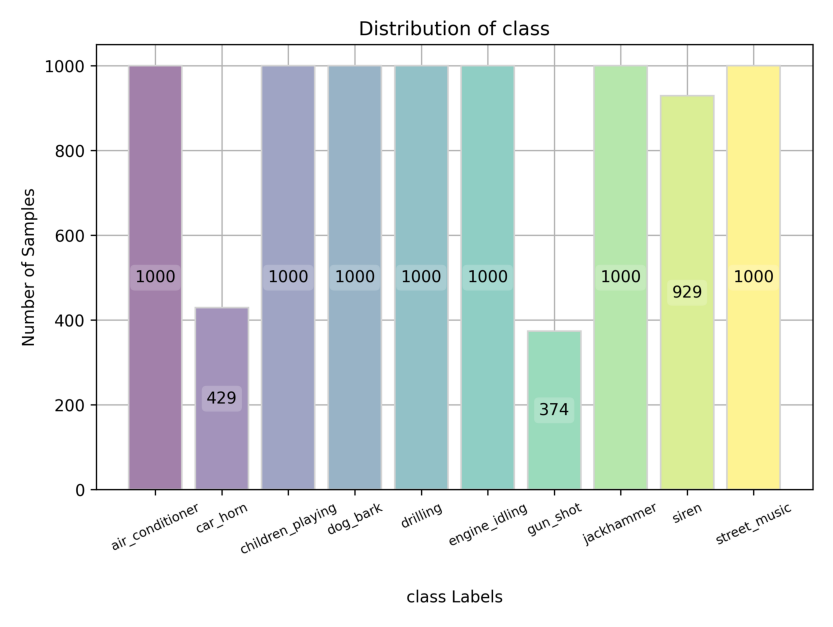

In [11]:
# Plot the distribution of the target class
plotFeatureDistribution(df=df, classFeature='class', pathsConfig=pathsConfig)

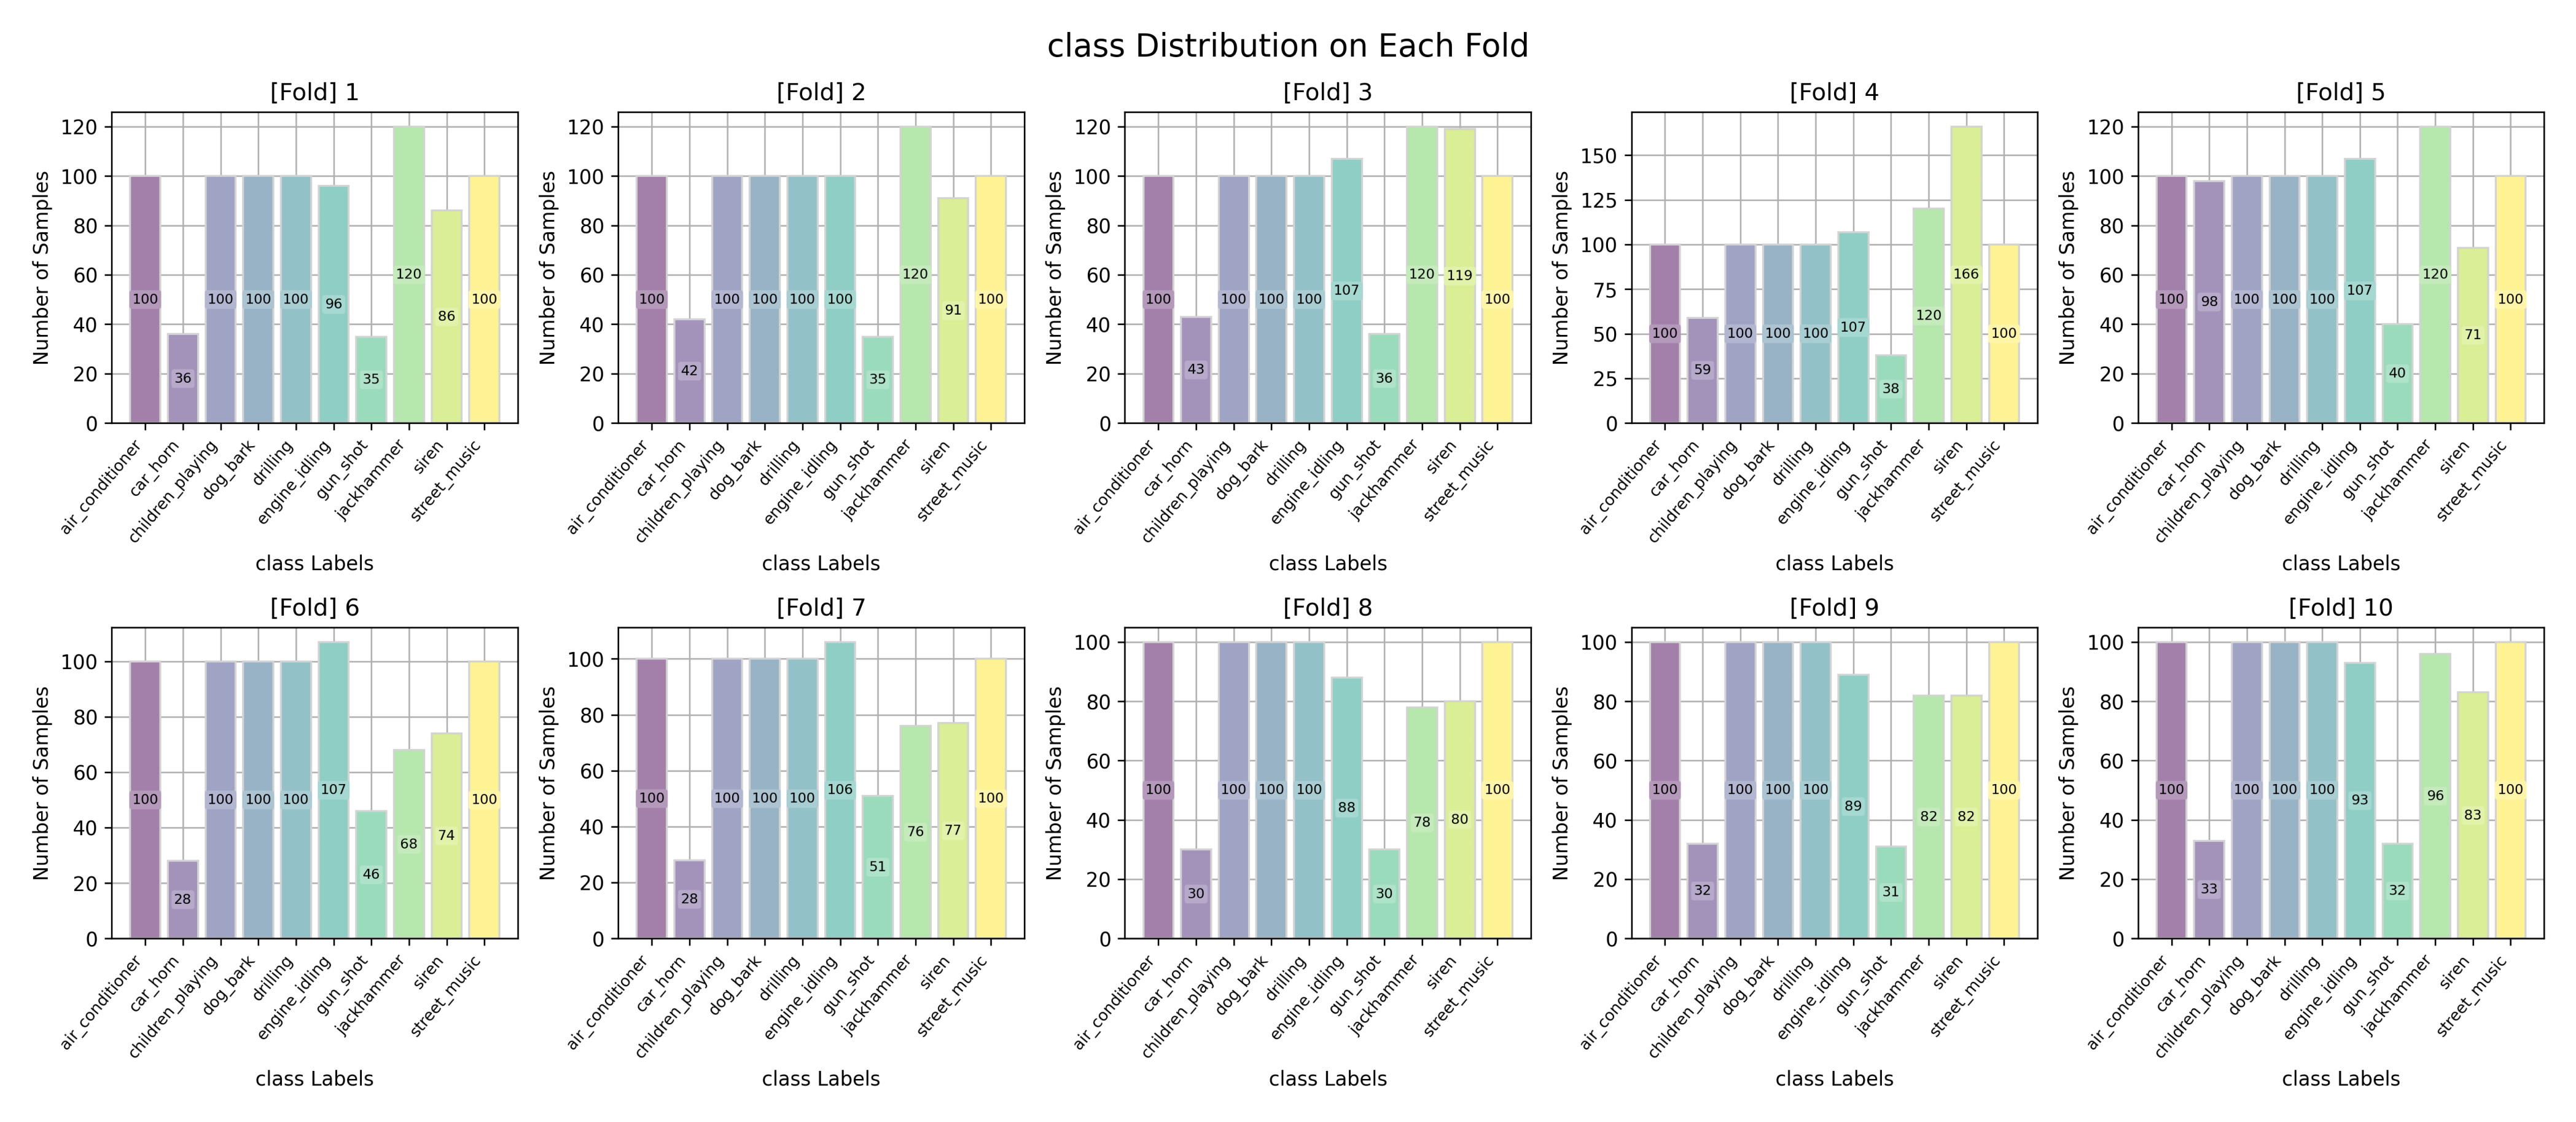

In [12]:
# Plot the class distribution per fold
plotFeatureDistributionByFold(df=df, classFeature='class', foldFeature='fold', pathsConfig=pathsConfig)

<div align="center">
    
---
## Data Preprocessing
---

</div>

> EXTRACT THE IMPORTANT FEATURES FROM THE AUDIO SAMPLES


In this initial phase, we aim to 

---
### Sound Features
---

To accurately analyze and extract features from audio samples, we first need to load them properly. Using the librosa library, we can handle each audio file from the dataset with careful consideration of duration, sample rate, and zero-padding.

The target length is calculated as the product of the DURATION (4 seconds, as specified in the dataset) and the TARGET_SAMPLE_RATE.

We opted to increase the sample rate from the default 22,050 Hz to 44,100 Hz to capture higher-quality details, given the variety of sounds in the dataset — ranging from complex audio like street music to simpler noises like car horns. 

Consequently, zero-padding will ensure that all audio samples remain with a consistent length, standardizing the dataset for more reliable feature extraction. Moreover, this size consistency is crucial when training deep learning models, since they require a uniform input size across all samples.

In [13]:
# Load a audio
audioName = '101415-3-0-2.wav'
audioData = loadAudio(df_audio=df, audioSliceName=audioName, audioDuration=config['DURATION'], targetSampleRate=config['SAMPLE_RATE'], usePadding=True)
audioData.shape

(176400,)

In [14]:
# Show the audio associated with the selected file
showcaseAudio(df_audio=df, audioSliceName=audioName)

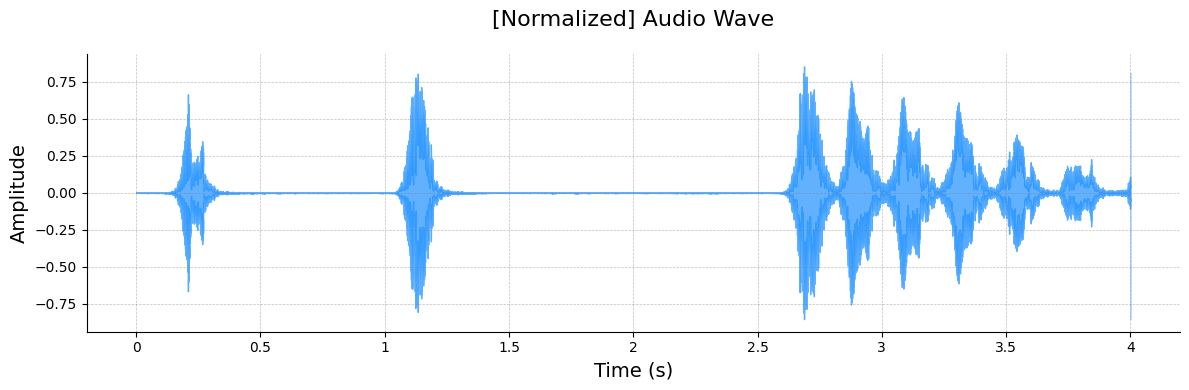

In [15]:
# Plot the Audio Wave
plotAudioWave(df_audio=df, audioSliceName=audioName, config=config)

---
### 1-Dimensional Features
---

#### &rarr; Zero-Crossing Rate (ZCR)

``Description`` : ZCR measures how often the signal changes sign (crosses zero) in a frame.

This is a time-domain feature that is particularly useful for distinguishing between different types of noise or impulsive sounds, such as car horns or dog barks, which have different temporal behaviors.

In [16]:
# Compute the Audio's Zero Crossing Rate
zeroCrossingRate = libr.feature.zero_crossing_rate(y=audioData)
print(zeroCrossingRate.shape)
# zeroCrossingRate

(1, 345)


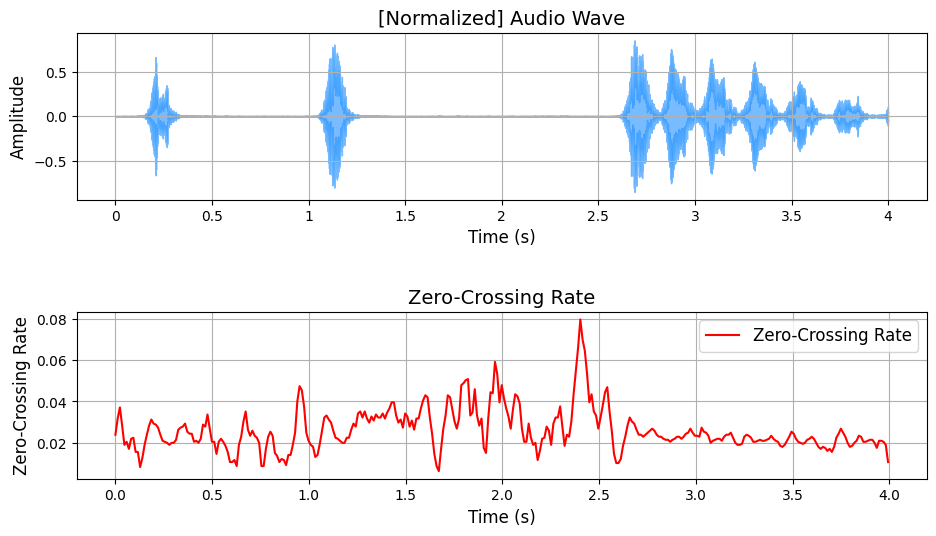

In [17]:
# Plot the Audio's Zero-Crossing Rate
plotAudio1DimensionalFeature(audioData=audioData, extracted1DimensionalFeature=zeroCrossingRate, featureName='Zero-Crossing Rate', yLabel='Zero-Crossing Rate', color='r', config=config)

#### &rarr; Spectral Centroid

``Description`` : The spectral centroid is the "center of mass" of the spectrum, giving an indication of where the energy of the sound is concentrated.

It helps in distinguishing between sounds with different frequency content (e.g., high-pitched sirens vs. low-pitched engine noises).

In [18]:
# Compute the Audio's Spectral Centroid
spectralCentroid = libr.feature.spectral_centroid(y=audioData, sr=config['SAMPLE_RATE'])
print(spectralCentroid.shape)
# spectralCentroid

(1, 345)


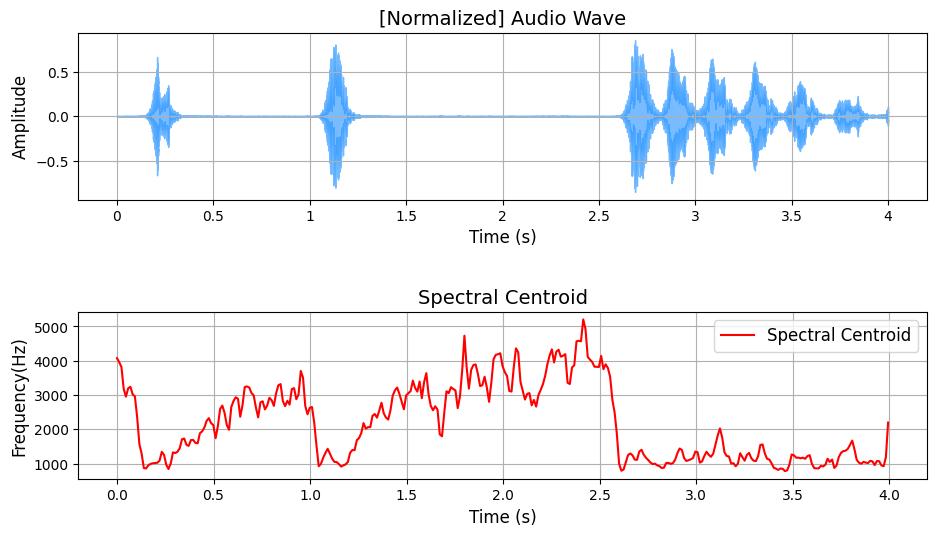

In [19]:
# Plot the Audio's Spectral Centroid
plotAudio1DimensionalFeature(audioData=audioData, extracted1DimensionalFeature=spectralCentroid, featureName='Spectral Centroid', yLabel='Frequency(Hz)', color='r', config=config)

#### &rarr; Spectral Bandwidth

``Description`` : This measures the width of the spectrum (the difference between the lower and upper frequencies in a sound).

It helps distinguish sounds with wide frequency content (e.g., crowd noise) from those with narrow frequency content (e.g., beeps or alarms).

In [20]:
# Compute the Audio's Spectral Bandwidth
spectralBandwidth = libr.feature.spectral_bandwidth(y=audioData, sr=config['SAMPLE_RATE'])
print(spectralBandwidth.shape)
# spectralBandwidth

(1, 345)


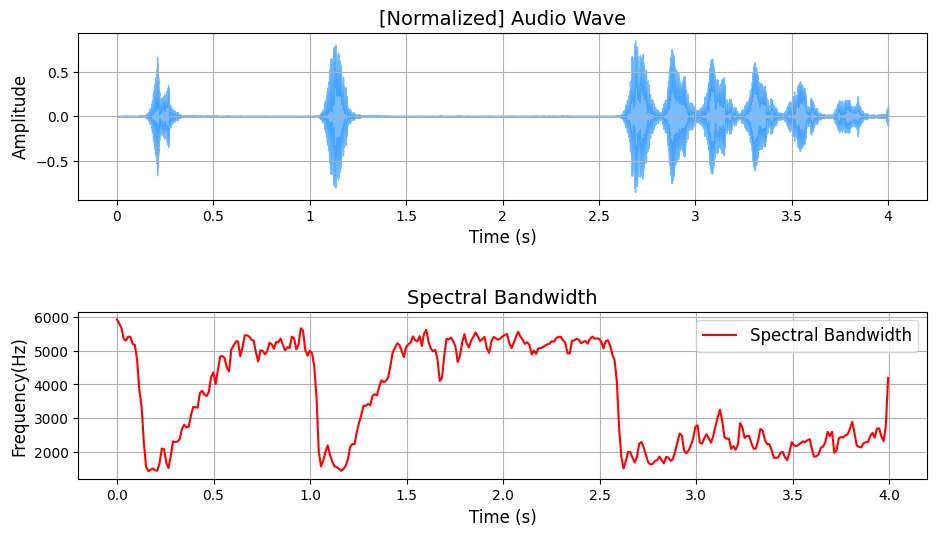

In [21]:
# Plot the Audio's Spectral Bandwidth
plotAudio1DimensionalFeature(audioData=audioData, extracted1DimensionalFeature=spectralBandwidth, featureName='Spectral Bandwidth', yLabel='Frequency(Hz)', color='r', config=config)

#### &rarr; Spectral Flatness

``Description`` : Measures how noise-like or tonal a sound is by comparing the geometric and arithmetic means of the power spectrum.

Helps distinguish between tonal sounds (e.g., sirens, horns) and noise-like sounds (e.g., wind, traffic).

In [22]:
# Compute the Audio's Spectral Flatness
spectralFlatness = libr.feature.spectral_flatness(y=audioData)
print(spectralFlatness.shape)
# spectralFlatness

(1, 345)


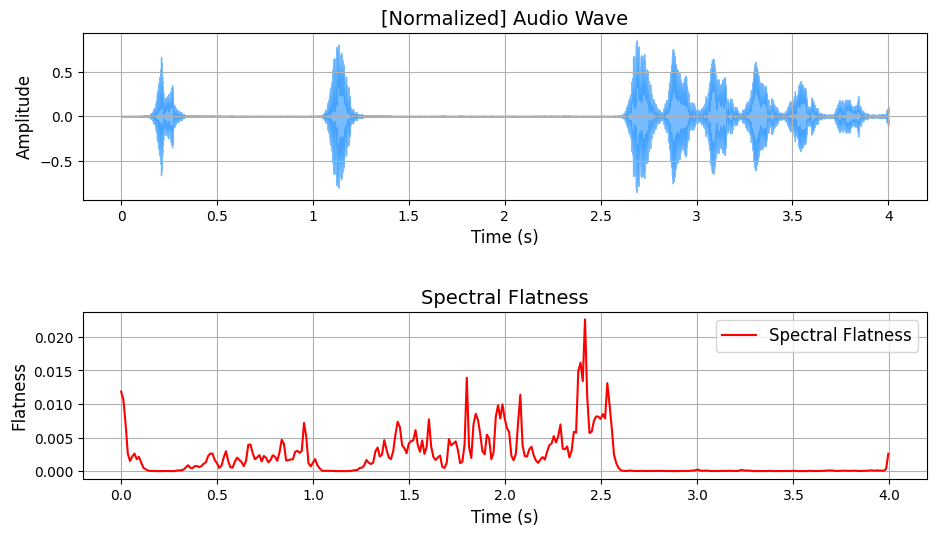

In [23]:
# Plot the Audio's Spectral Flatness
plotAudio1DimensionalFeature(audioData=audioData, extracted1DimensionalFeature=spectralFlatness, featureName='Spectral Flatness', yLabel='Flatness', color='r', config=config)

#### &rarr; Spectral Roll-off

``Description`` : Spectral roll-off is the frequency below which a specified percentage (usually 85-90%) of the total spectral energy is contained.

It helps differentiate between high-frequency sounds (e.g., sharp noises like sirens or alarms) and low-frequency sounds (e.g., engine noise, rumbling).

In [24]:
# Compute the Audio's Spectral Roll-off
spectralRolloff = libr.feature.spectral_rolloff(y=audioData, sr=config['SAMPLE_RATE'])
print(spectralRolloff.shape)
# spectralRolloff

(1, 345)


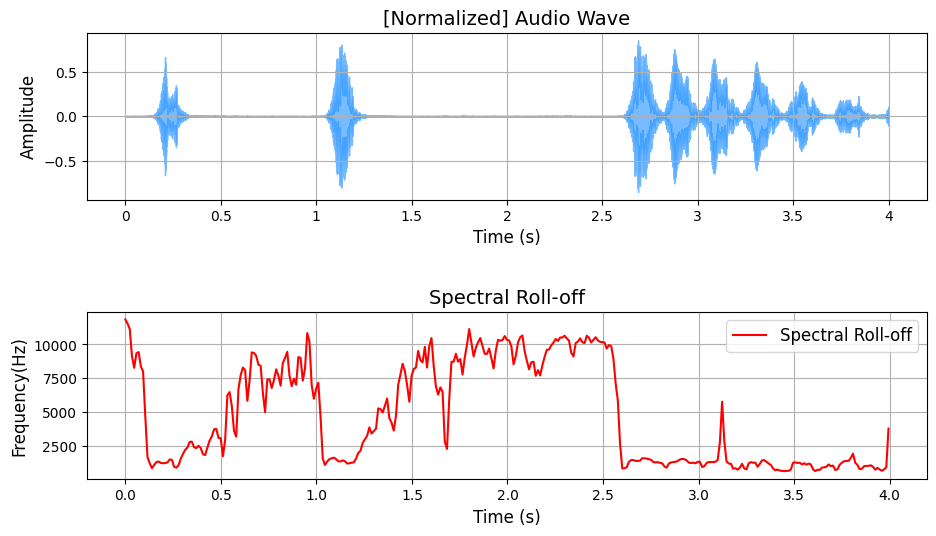

In [25]:
# Plot the Audio's Spectrall Roll-off
plotAudio1DimensionalFeature(audioData=audioData, extracted1DimensionalFeature=spectralRolloff, featureName='Spectral Roll-off', yLabel='Frequency(Hz)', color='r', config=config)

#### &rarr; RMS Energy

``Description`` : The Root Mean Square (RMS) energy is a measure of the signal's energy over time.

It is useful to distinguish between quiet and loud sounds and can help classify sounds with varying intensity, such as traffic or construction noise.

In [26]:
# Compute the Audio's RMS Energy
rms = libr.feature.rms(y=audioData)
print(rms.shape)
# rms

(1, 345)


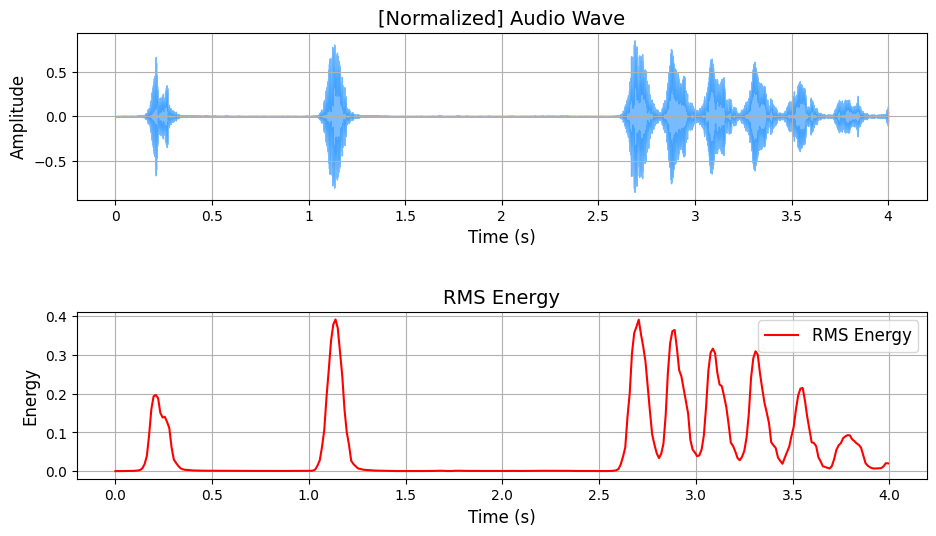

In [27]:
# Plot the Audio's RMS Energy
plotAudio1DimensionalFeature(audioData=audioData, extracted1DimensionalFeature=rms, featureName='RMS Energy', yLabel='Energy', color='r', config=config)

---
### 2-Dimensional Features
---

#### &rarr; Mel-Frequency Cepstral Coefficients (MFCC)

``Description`` : MFCCs represent the short-term power spectrum of an audio signal, emphasizing the perceptually relevant features for human hearing.

MFCCs are widely used in audio classification tasks, including speech recognition and environmental sound classification. They effectively capture the timbral texture of sounds, which is important for distinguishing different urban sound categories.

In [28]:
# Compute the MFC Coefficients
mfccs = libr.feature.mfcc(y=audioData, sr=config['SAMPLE_RATE'], n_mfcc=config['N_MFCC'])
print(mfccs.shape)
# mfccs

(13, 345)


#### &rarr; Chroma Features (Chroma STFT)

``Description`` : Chroma features represent the pitch class (e.g., C, C#, D, etc.) and are useful for identifying tonal and harmonic content in audio.

While chroma features are traditionally more useful for music, they can capture harmonic structure in urban sounds, especially those with tonal elements like sirens or honking.

In [29]:
# Compute the Chroma Features
chroma_stft = libr.feature.chroma_stft(y=audioData, n_chroma=config['N_CHROMA'], sr=config['SAMPLE_RATE'], n_fft=config['N_FFT'], hop_length=config['HOP_LENGTH'], win_length=config['WINDOW_LENGTH'])
print(chroma_stft.shape)
# chroma_stft

(12, 321)


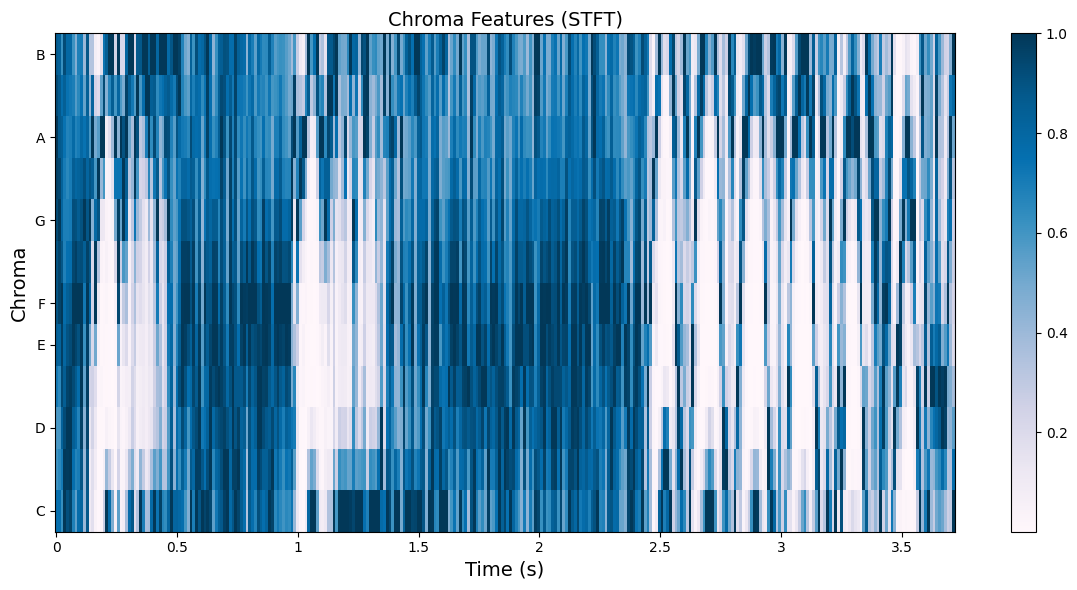

In [30]:
# Plot the audio's Chroma Features
plotChromaFeatures(audioData=audioData, config=config)

#### &rarr; Mel Spectrogram

``Description`` : A Mel spectrogram is a representation of the signal's power across different frequencies, scaled to the Mel scale (which mimics human auditory perception).

It is particularly useful for capturing the overall energy and frequency distribution of urban sounds. It’s a more detailed version of MFCCs, emphasizing the full frequency range.

In [31]:
# Compute the Mel Spectrogram
melSpectrogram = libr.feature.melspectrogram(y=audioData, sr=config['SAMPLE_RATE'])
print(melSpectrogram.shape)
# melSpectrogram

(128, 345)


In [32]:
np.mean(melSpectrogram, axis=1).shape

(128,)

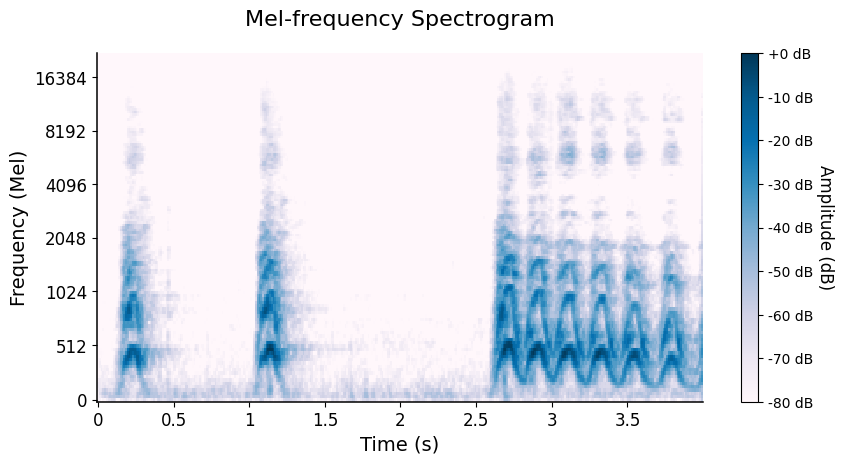

In [33]:
# Plot the Mel Spectrogram
plotMelSpectrogram(audioData, config['SAMPLE_RATE'])

#### &rarr; Spectral Contrast

``Description`` : Spectral contrast measures the difference between peaks and valleys in the sound spectrum.

Urban sounds tend to have diverse spectral profiles (e.g., the contrast between loud car horns and quieter ambient sounds), making spectral contrast useful for distinguishing between classes.

In [34]:
# Compute the Spectral Contrast
spectralContrast = libr.feature.spectral_contrast(y=audioData, sr=config['SAMPLE_RATE'])
print(spectralContrast.shape)
# spectralContrast

(7, 345)


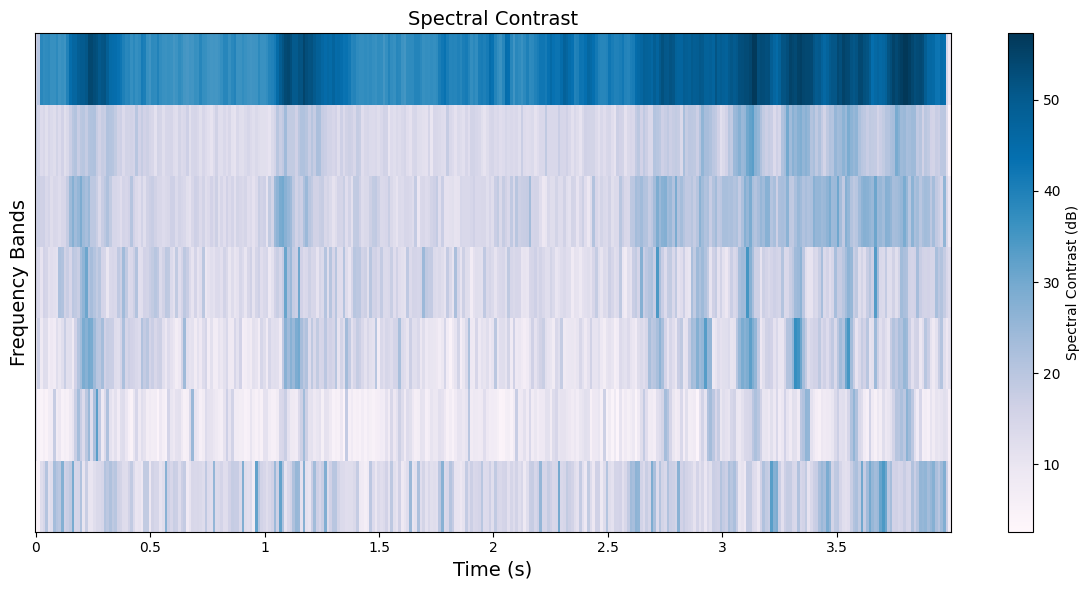

In [35]:
# Plot the Audio's Spectral Contrast
plotSpectralContrast(audioData=audioData, config=config)

---
## Data Pre-Processing and Preparation
---

> PERFORM DATA PREPROCESSING AND PREPARATION

In [36]:
# Extract all the 1-Dimensional and 2-Dimensional Features on each Fold
for fold in range(1, 11):

    print(f"[CURRENT] Fold {fold}")
    
    # Extract all Raw Features
    extractAllRawFeatures(audio_df=df, fold=fold, config=config, pathsConfig=pathsConfig)

    # Extract and process 1-Dimensional Features
    extractRawFeatures1D(audio_df=df, fold=fold, config=config, pathsConfig=pathsConfig)
    processRawFeatures(fold=fold, intervalStep=20, featuresDimensionality="1D", pathsConfig=pathsConfig)
    
    # Extract and process 2-Dimensional Features
    extractRawFeatures2D(audio_df=df, fold=fold, config=config, pathsConfig=pathsConfig)
    processRawFeatures(fold=fold, intervalStep=20, featuresDimensionality="2D", pathsConfig=pathsConfig)

    # Extract the MFCCs (Raw and their mean based on the coefficients)
    extractMFCCs(audio_df=df, raw=True, fold=fold, config=config, pathsConfig=pathsConfig)
    extractMFCCs(audio_df=df, raw=False, fold=fold, config=config, pathsConfig=pathsConfig)

    # print(f"[Fold {fold}] Finished Extraction and Processment")

[CURRENT] Fold 1
[CURRENT] Fold 2
[CURRENT] Fold 3
[CURRENT] Fold 4
[CURRENT] Fold 5
[CURRENT] Fold 6
[CURRENT] Fold 7
[CURRENT] Fold 8
[CURRENT] Fold 9
[CURRENT] Fold 10


<div align="center">
    
---
## Model Architecture Definition
---

</div>

> ADD MODEL ARCHITECTURE DEFINITION

---
### Managing Training Data
---

> DEFINE THE NETWORK ARCHITECTURE

In [77]:
u = UrbanSound8kManager(dataDimensionality='1D', pathsConfig=pathsConfig)
# u = UrbanSound8kManager(dataDimensionality='2D', pathsConfig=pathsConfig)

In [66]:
uda = pd.read_pickle(pathsConfig["Datasets"][f"Fold-{1}"]["2D-Raw-Features"])
uda.head()

audio  fold                                               MFCC  \
0  101415-3-0-2.wav     1  [[-515.2679, -512.022, -511.61533, -509.11337,...   
1  101415-3-0-3.wav     1  [[-515.607, -515.9267, -515.9208, -514.9836, -...   
2  101415-3-0-8.wav     1  [[-140.91316, -180.47021, -253.62337, -268.960...   
3  102106-3-0-0.wav     1  [[-330.4947, -282.15903, -294.1911, -328.76797...   
4  102305-6-0-0.wav     1  [[-245.41306, -158.65527, -142.28607, -153.085...   

                                         Chroma STFT  \
0  [[0.75722647, 0.75903153, 0.62528646, 1.0, 0.9...   
1  [[0.87785035, 0.6743755, 1.0, 0.82853323, 0.67...   
2  [[0.35262203, 0.4739977, 0.9742633, 1.0, 1.0, ...   
3  [[0.40412205, 0.5791709, 0.26782256, 0.4121564...   
4  [[0.6570865, 1.0, 0.5088862, 0.958025, 0.26133...   

                                     Mel Spectrogram  \
0  [[9.2208975e-05, 7.018026e-05, 2.0398431e-05, ...   
1  [[0.00019933976, 0.0003074245, 0.00031207257, ...   
2  [[0.201765, 0.06524737, 0.002189428, 0.0039699...   
3  [[0.00425075, 0.015391635, 0.009113342, 0.0093...   
4  [[15.630943, 70.72084, 107.339645, 106.410675,...   

                                   Spectral Contrast    target  
0  [[2.590017265140709, 5.003585647207025, 12.833...  dog_bark  
1  [[9.283914150660065, 18.100965475649634, 13.92...  dog_bark  
2  [[2.483182110308062, 3.207296226496833, 11.255...  dog_bark  
3  [[6.108814515223847, 7.9651262269872705, 5.372...  dog_bark  
4  [[10.434235953158437, 22.465160724445013, 8.02...  gun_shot

In [78]:
X_train, y_train, X_val, y_val, X_test, y_test = u.getTrainTestSplitFold(testFold=10)

In [31]:
X_train

array([[-0.6118762 , -0.61187462, -0.61190127, ...,  0.79285554,
         0.70893218, -0.34538778],
       [-0.6118709 , -0.61186965, -0.61190151, ...,  0.73515823,
         0.74231079, -0.49984005],
       [-0.61186883, -0.61186694, -0.61190222, ...,  1.11805853,
         1.14762244, -0.45868259],
       ...,
       [-0.61188618, -0.61188662, -0.61190388, ...,  1.1585897 ,
         1.15715918, -0.53406263],
       [-0.61188116, -0.61188078, -0.61190193, ...,  1.16526542,
         1.17623267, -0.52157052],
       [-0.61187362, -0.61187397, -0.61190101, ...,  1.20150505,
         1.17623267, -0.53301812]])

In [32]:
X_train.shape

(7022, 255)

In [70]:
y_train.shape

(7859, 10)

---
### Multi-Layered Perceptron (MLP)
---

> DEFINE THE NETWORK ARCHITECTURE

In [71]:
def createMLP():
    # TO BE IMPLEMENTED
    return None

In [89]:
mlp = MLP()
model = mlp.createMLP(input_shape=(255,))

---
### Convolutional Neural Network (CNN)
---

> DEFINE THE NETWORK ARCHITECTURE

In [72]:
def createCNN():
    # TO BE IMPLEMENTED
    return None

In [73]:
cnn = CNN()
# model = cnn.create1DCNN(input_shape=(459, 1))
model = cnn.create2DCNN(input_shape=(13, 345, 1))

In [ ]:
from ModelDevelopmentAndEvaluation.transferLearning import createTransferLearning

model = createTransferLearning()

In [90]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │        65,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,898 (523.04 KB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 0 (0.00 B)

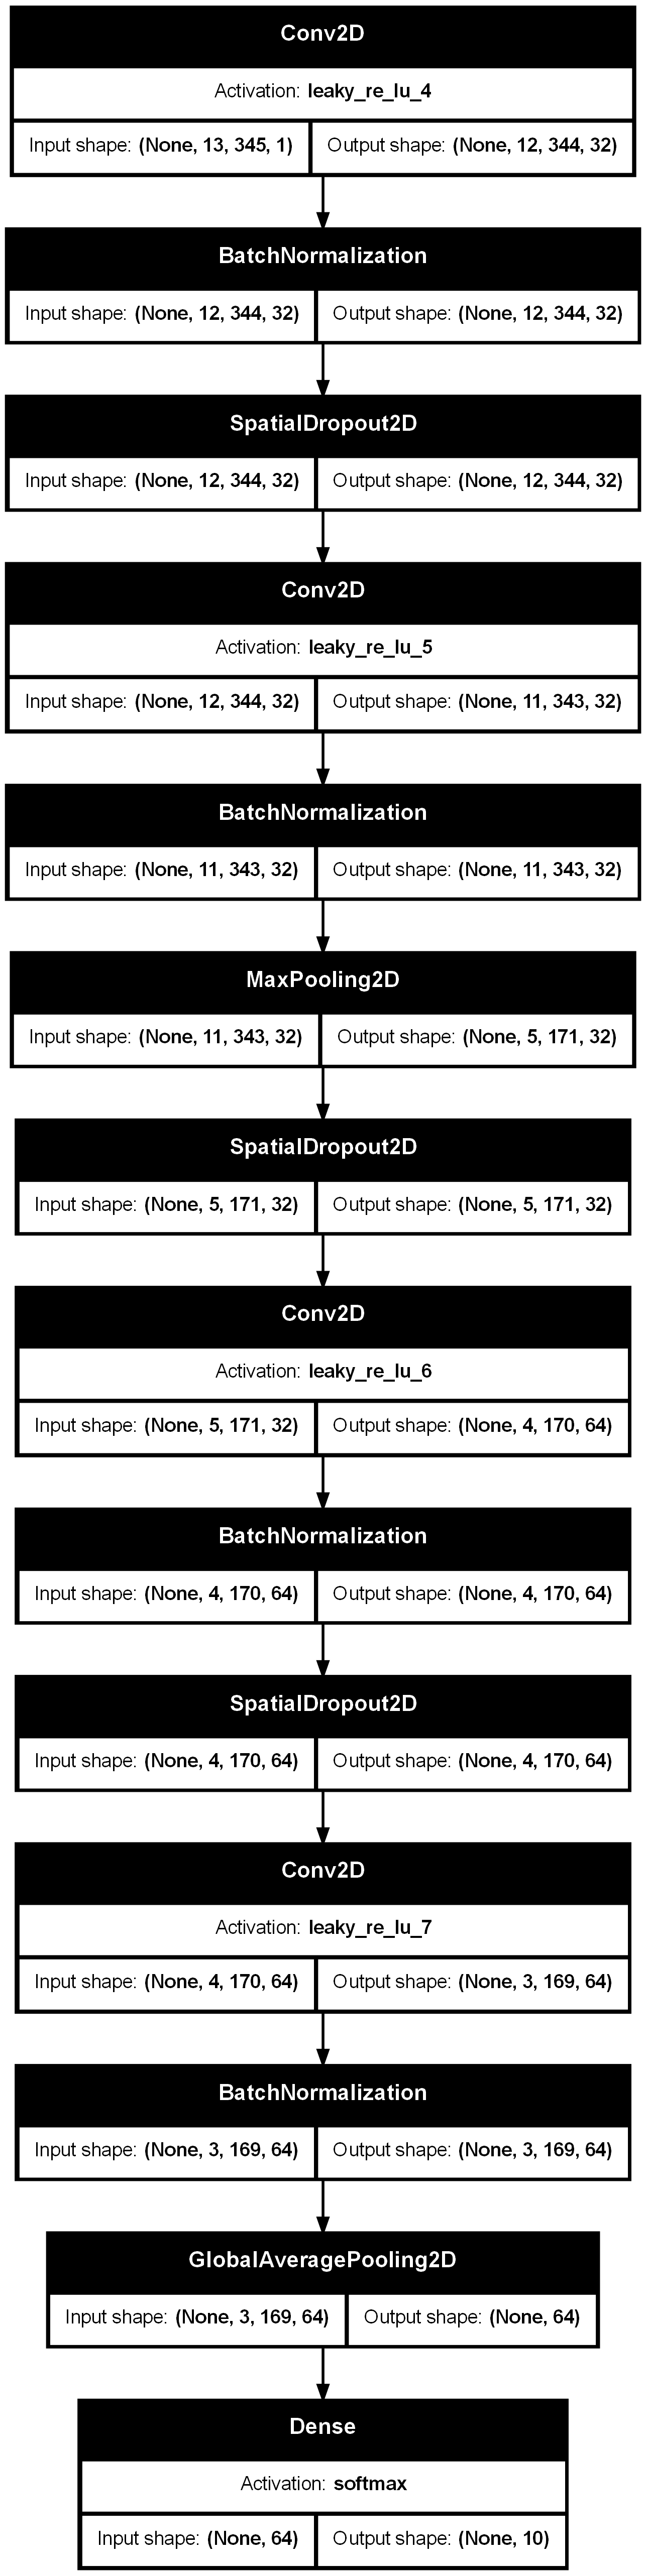

In [75]:
keras.utils.plot_model(model, "model.png", show_shapes=True, show_layer_activations=True, rankdir='TB', expand_nested=False)

In [87]:
# Define callbacks
def callbacks():
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        min_delta=5e-4,
        patience=10,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=10,
        min_lr=1e-5
    )

    return [early_stopping, reduce_lr]

Cross-validating...:   0%|          | 0/10 [00:00<?, ?it/s]

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2478 - loss: 2.0191 - val_accuracy: 0.3041 - val_loss: 2.0679 - learning_rate: 1.0000e-05
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


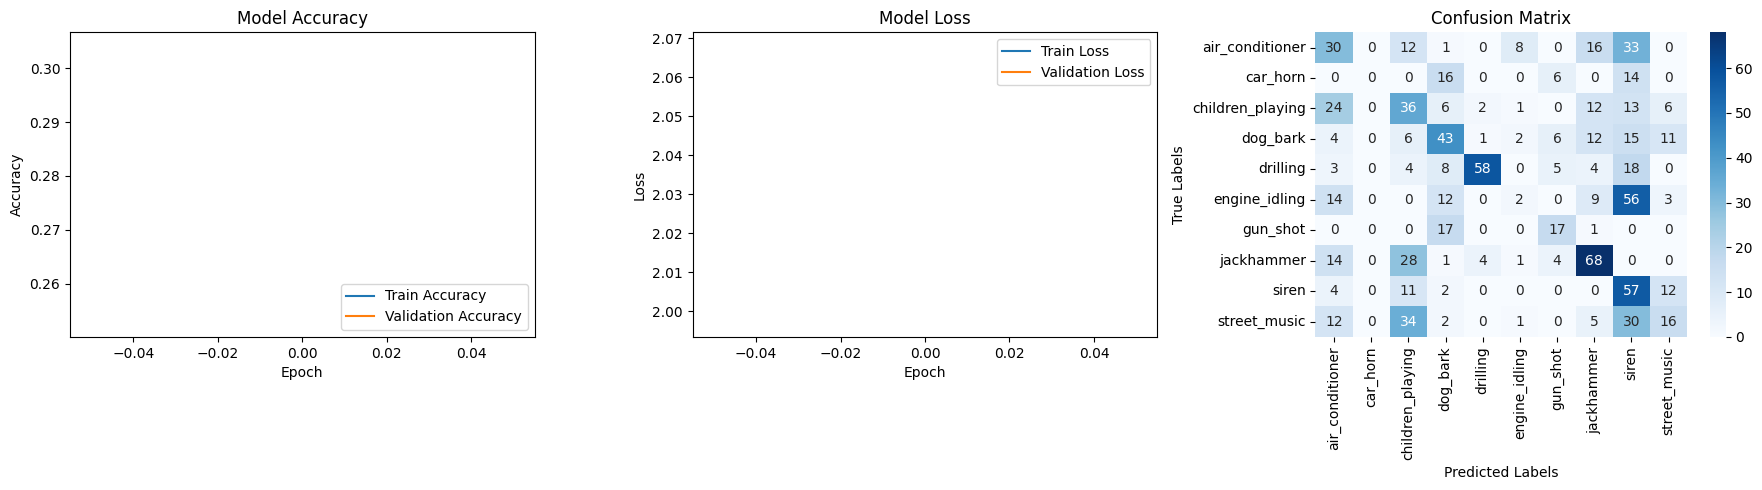

Cross-validating...:  10%|█         | 1/10 [00:05<00:50,  5.57s/it]

217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2607 - loss: 1.9866 - val_accuracy: 0.2876 - val_loss: 1.9638 - learning_rate: 1.0000e-05
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


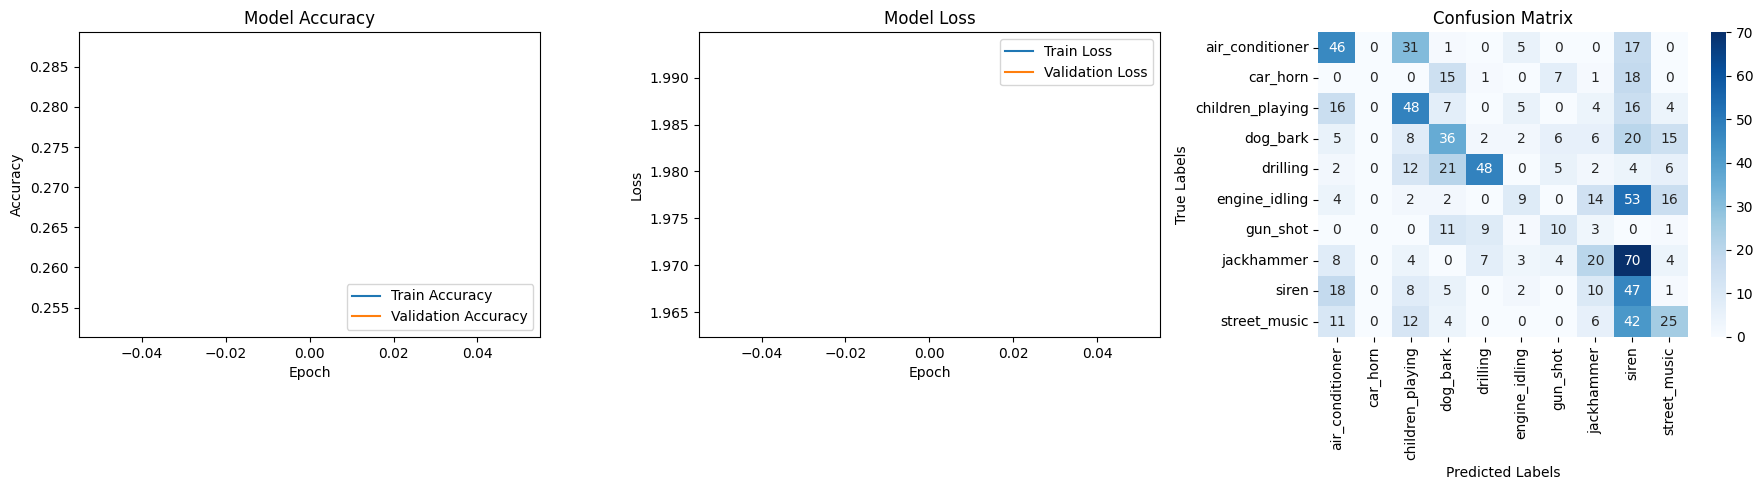

Cross-validating...:  20%|██        | 2/10 [00:11<00:45,  5.72s/it]

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2353 - loss: 2.0083 - val_accuracy: 0.3657 - val_loss: 1.9321 - learning_rate: 1.0000e-05
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


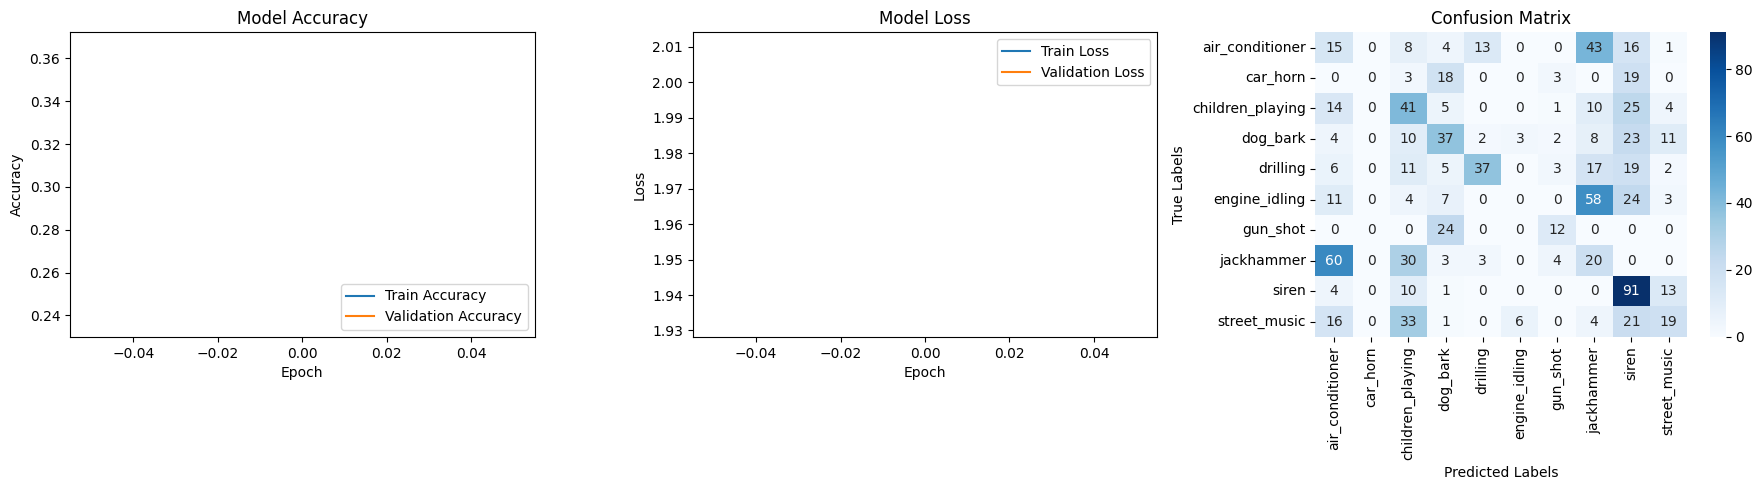

Cross-validating...:  30%|███       | 3/10 [00:15<00:34,  4.98s/it]

213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2412 - loss: 2.0156 - val_accuracy: 0.2404 - val_loss: 1.9240 - learning_rate: 1.0000e-05
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Cross-validating...:  40%|████      | 4/10 [00:20<00:29,  4.92s/it]

218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2507 - loss: 2.0264 - val_accuracy: 0.2770 - val_loss: 1.8830 - learning_rate: 1.0000e-05
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Cross-validating...:  50%|█████     | 5/10 [00:25<00:24,  4.88s/it]

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2527 - loss: 2.0148 - val_accuracy: 0.2613 - val_loss: 1.9595 - learning_rate: 1.0000e-05
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


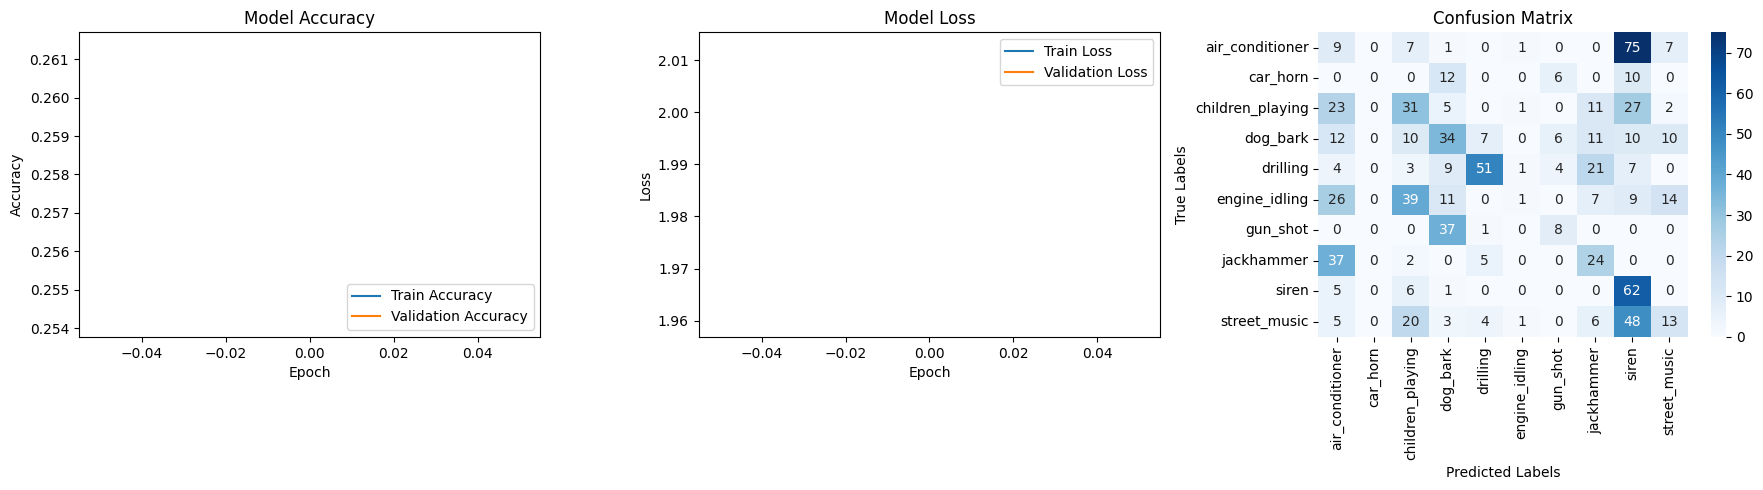

Cross-validating...:  60%|██████    | 6/10 [00:29<00:19,  4.77s/it]

222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2540 - loss: 2.0211 - val_accuracy: 0.3251 - val_loss: 1.8541 - learning_rate: 1.0000e-05
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


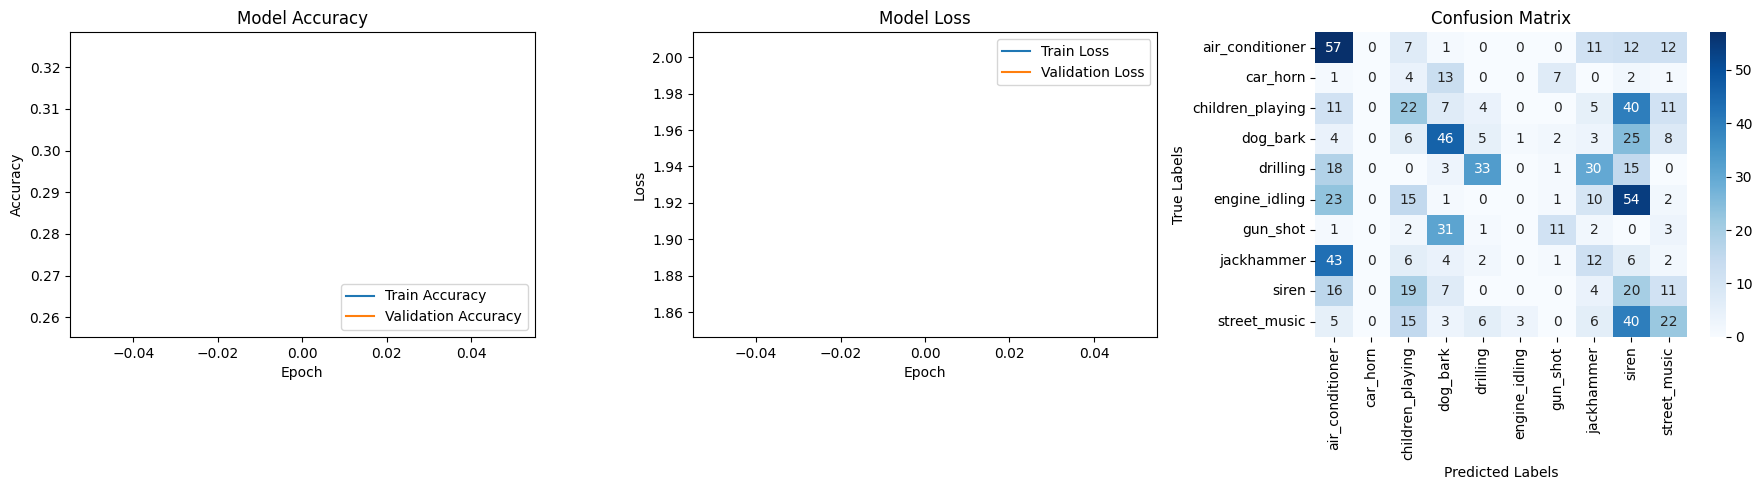

Cross-validating...:  70%|███████   | 7/10 [00:35<00:15,  5.07s/it]

223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2364 - loss: 2.0467 - val_accuracy: 0.2966 - val_loss: 1.8611 - learning_rate: 1.0000e-05
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


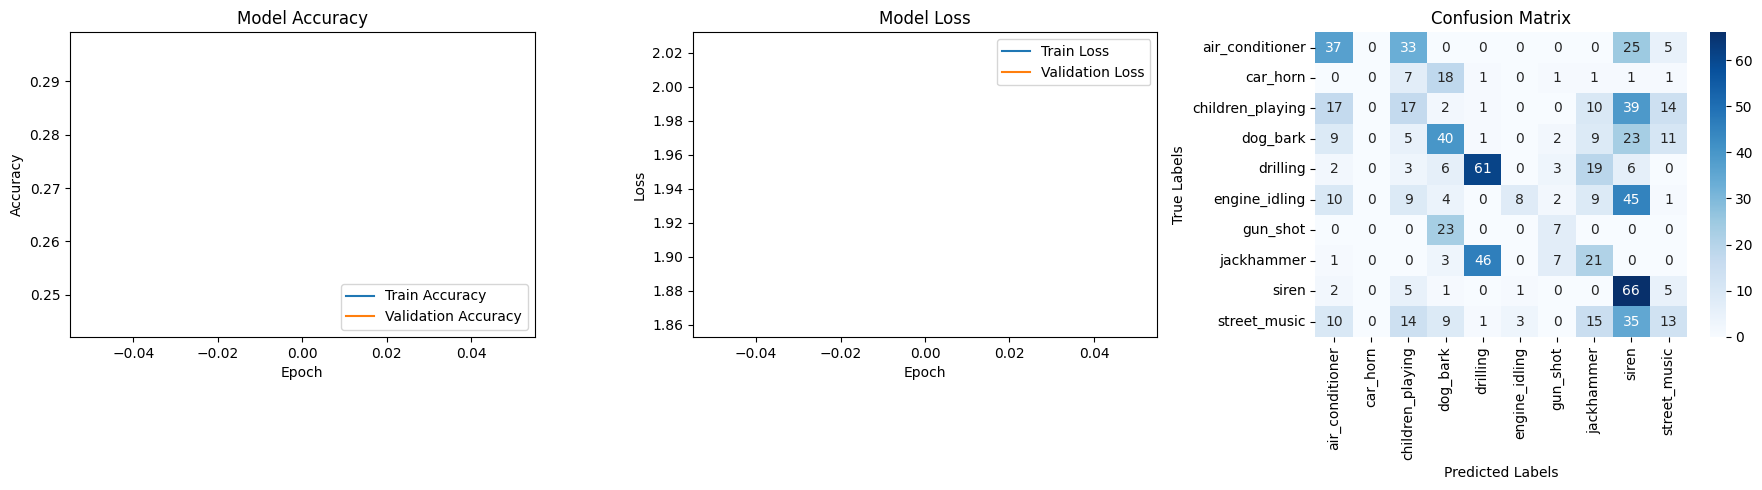

Cross-validating...:  80%|████████  | 8/10 [00:40<00:10,  5.14s/it]

222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2518 - loss: 2.0118 - val_accuracy: 0.2772 - val_loss: 1.9154 - learning_rate: 1.0000e-05
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


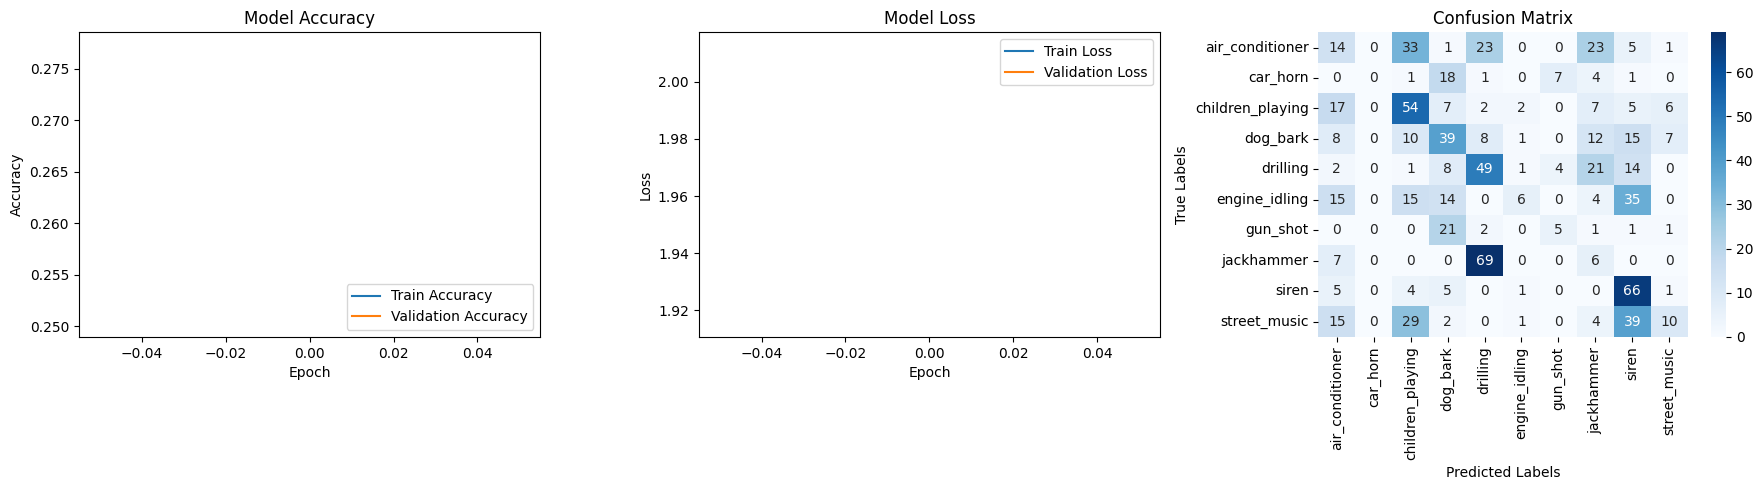

Cross-validating...:  90%|█████████ | 9/10 [00:44<00:04,  4.80s/it]

220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2419 - loss: 2.0346 - val_accuracy: 0.3608 - val_loss: 1.8436 - learning_rate: 1.0000e-05
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Cross-validating...: 100%|██████████| 10/10 [00:49<00:00,  4.94s/it]


([<keras.src.callbacks.history.History at 0x79264a1a01c0>,
 [array([[321,   0, 175,  13,  45,  14,   0, 133, 271,  28],
         [  8,   0,  59, 158,   6,   0,  47,  19, 121,  11],
         [161,   0, 357,  54,  22,  10,   3,  87, 235,  71],
         [ 77,   0,  86, 378,  39,  10,  41,  82, 182, 105],
         [ 92,   0,  60,  75, 463,   5,  39, 169,  89,   8],
         [181,   0, 164,  89,  19,  30,   4, 163, 299,  51],
         [  1,   0,   2, 229,  16,   2, 105,  12,   1,   6],
         [190,   0,  97,  45, 262,   6,  35, 265,  83,  17],
         [ 78,   0, 100,  45,   0,  30,   3,  23, 601,  49],
         [106,   0, 198,  47,  14,  20,   0,  54, 383, 178]]),
  array([[46,  0, 31,  1,  0,  5,  0,  0, 17,  0],
         [ 0,  0,  0, 15,  1,  0,  7,  1, 18,  0],
         [16,  0, 48,  7,  0,  5,  0,  4, 16,  4],
         [ 5,  0,  8, 36,  2,  2,  6,  6, 20, 15],
         [ 2,  0, 12, 21, 48,  0,  5,  2,  4,  6],
         [ 4,  0,  2,  2,  0,  9,  0, 14, 53, 16],
         [ 0,  0,  0, 1

In [97]:
u.cross_validate(model, epochs=1, callbacks=callbacks)

In [ ]:
plt.subplots()

In [88]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    callbacks=callbacks()
)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5866 - loss: 1.1498 - val_accuracy: 0.4639 - val_loss: 1.6873 - learning_rate: 5.0000e-04
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5863 - loss: 1.1414 - val_accuracy: 0.4685 - val_loss: 1.7125 - learning_rate: 5.0000e-04
Epoch 3/50
 92/110 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5981 - loss: 1.0982

KeyboardInterrupt: 

In [86]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")

### YAMNET - PRETRAINED NETWORK

In [43]:
# YAMNET Details @ https://www.tensorflow.org/hub/tutorials/yamnet?hl=pt-br

# Load the model.
model = hub.load('https://tfhub.dev/google/yamnet/1')

---
### [BONUS] MODEL (?)
---

> DEFINE THE NETWORK ARCHITECTURE

In [125]:
def createCENAS(input_shape):
    pass

<div align="center">
    
---
## Training Strategies
---

</div>

> ADD TRAINING STRATEGIES

In [45]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found. Please ensure TensorFlow GPU version is installed.")
    
# Clear GPU cache
# tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

GPU not found. Please ensure TensorFlow GPU version is installed.


<div align="center">
    
---
## Performance Evaluation
---

</div>

> ADD PERFORMANCE EVALUATION

<div align="center">

***
## Bibliographic References
***
</div>

1. AUTHOR (DATE OF PUBLICATION). __*ARTICLE TITLE*__. Available [here](__INSERT_LINK__)

LINKS:
- https://medium.com/@MuhyEddin/feature-extraction-is-one-of-the-most-important-steps-in-developing-any-machine-learning-or-deep-94cf33a5dd46
- https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504
- https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5
- https://medium.com/@oluyaled/audio-classification-using-deep-learning-and-tensorflow-a-step-by-step-guide-5327467ee9ab
- https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab

---
## Final Considerations

$\quad$ If there is any difficulty on downloading or executing this project, please contact us via:

- **Email**:
    - [Gonçalo Esteves](https://github.com/EstevesX10) &#8594; `up202203947@edu.fc.up.pt`
    - [Nuno Gomes](https://github.com/NightF0x26) &#8594; `up202206195@edu.fc.up.pt`
    - [Pedro Afonseca](https://github.com/PsuperX) &#8594; `up202205394@edu.fc.up.pt`

---
---

<div align="center">

## TESTS

</div>

### NETWORKS

In [72]:
# Define the model
model = Sequential([
    # layers.Dense(2048, activation='relu', input_shape=(config['N_MFCC'],)),
    layers.Dense(2048, activation='relu', input_shape=(1395, )),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [128]:
# model = ResNet(num_classes=10)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.2)

In [66]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=5e-4,
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

In [71]:
trainX.shape

(654, 13)

In [74]:
# Train the model
history = model.fit(
    trainX, trainY,
    # utrainX, utrainY,
    validation_data=(testX, testY),
    # validation_data=(utestX, utestY),
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.1545 - loss: 7.7999 - val_accuracy: 0.2740 - val_loss: 2.0062 - learning_rate: 0.0010
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3278 - loss: 1.9312 - val_accuracy: 0.4703 - val_loss: 1.5462 - learning_rate: 0.0010
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4856 - loss: 1.4525 - val_accuracy: 0.5023 - val_loss: 1.4744 - learning_rate: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4957 - loss: 1.4131 - val_accuracy: 0.5525 - val_loss: 1.1850 - learning_rate: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5562 - loss: 1.2214 - val_accuracy: 0.6438 - val_loss: 1.1501 - learning_rate: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6193 - loss: 0.9906 - val_accuracy: 0.6530 - val_loss: 0.9280 - learning_rate: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6858 - loss: 0.8561 - 

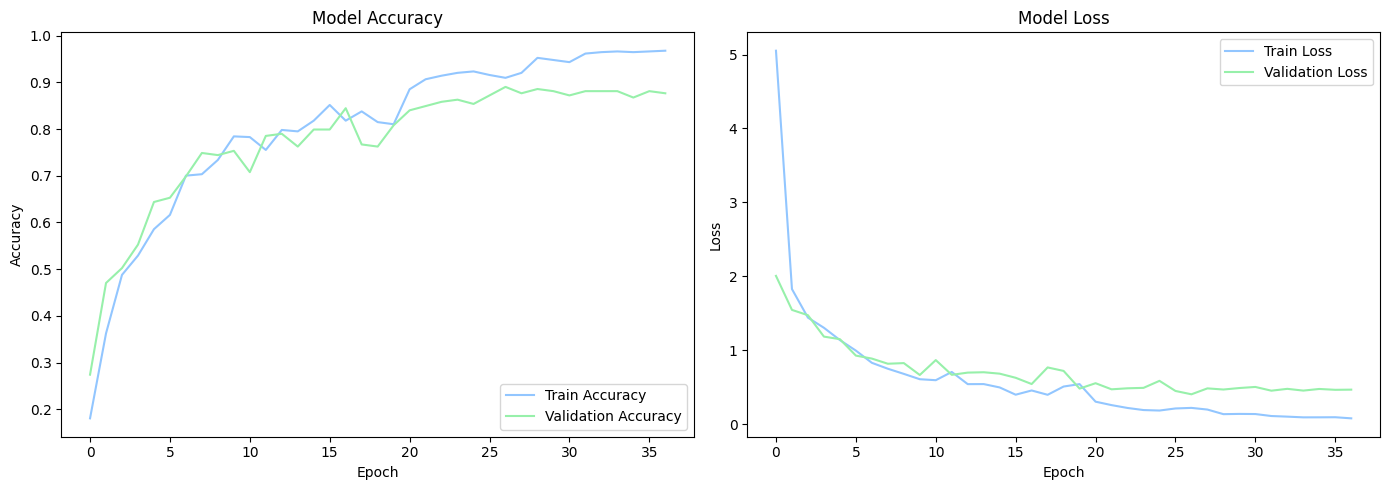

In [75]:
# Plot the Model Training Performance
plotNetworkTrainingPerformance(history.history)

In [ ]:
# %pip install scikeras

# WARNING: se usarmos pipelines e cross_validate do sklearn trainX pode n caber na memoria e ai fica complicado :/

In [ ]:
def dataset2Dataframe(ds: tf.data.Dataset) -> pd.DataFrame:
    data = []

    # Loop through the dataset and convert each example
    for embedding, label, fold in ds:
        embedding = embedding.numpy()
        label = label.numpy().decode('utf-8')
        fold = fold.numpy()
        
        # Append the data as a dictionary to the list
        data.append({
            'embedding': embedding,
            'label': label,
            'fold': fold,
        })

    return pd.DataFrame(data)

from ModelDevelopmentAndEvaluation. transferLearning import createEmbeddings, createTransferLearning

embeddings = createEmbeddings(df)
model = createTransferLearning()

embeddings = dataset2Dataframe(embeddings)

# TODO: make this pretty

In [75]:
from ModelDevelopmentAndEvaluation. transferLearning import createEmbeddingsFaster, createTransferLearning

embeddings = createEmbeddingsFaster(df)

In [102]:
embeddings.to_pickle(pathsConfig["Datasets"]["transfer"])

---

In [ ]:
from ModelDevelopmentAndEvaluation. transferLearning import createEmbeddingsFaster, createTransferLearning

u = UrbanSound8kManager(dataDimensionality='transfer', pathsConfig=pathsConfig)

model = createTransferLearning()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

u.cross_validate(model, epochs=2)
# X_train, y_train, X_test, y_test = u.getTrainTestSplitFold(testFold=1)

In [10]:
X_train.shape

(155650, 1024)

In [11]:
y_train.shape

(155650, 10)

In [8]:
model.fit(X_train, y_train)

2024-11-14 11:11:16.547473: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 637542400 exceeds 10% of free system memory.


4865/4865 ━━━━━━━━━━━━━━━━━━━━ 143s 29ms/step - accuracy: 0.2039 - loss: 9.9388


In [150]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import PredefinedSplit, cross_validate
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder

classifier = KerasClassifier(
    build_fn=lambda: model,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
)

# split = PredefinedSplit(df.iloc[train_indices]["fold"])
encoder = LabelEncoder()
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', classifier)          # TensorFlow model
])

# (888, 13, 345)

# cv_results = cross_validate(pipeline, trainX, trainY, cv=split)
history = pipeline.fit(utrainX, utrainY)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.2486 - loss: 2.0564 - learning_rate: 0.0010
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.6513 - loss: 0.9233 - learning_rate: 0.0010
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.7912 - loss: 0.5170 - learning_rate: 0.0010
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.8852 - loss: 0.3332 - learning_rate: 0.0010
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9211 - loss: 0.2393 - learning_rate: 0.0010
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.9529 - loss: 0.1514 - learning_rate: 0.0010
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.9565 - loss: 0.1169 - learning_rate: 0.0010
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.9814 - loss: 0.0601 - learning_rate: 0.0010
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9714 - loss: 0.0862 - learning_rate: 0.0010
Epoch 10/1

In [151]:
# history = cv_results.best_estimator_.named_steps["model"].history_
history2 = pipeline.named_steps["model"].history_

In [152]:
# Plot training & validation accuracy and loss values
plotNetworkTrainingPerformance(history2)

In [140]:
history.named_steps.model.history_

defaultdict(list,
            {'accuracy': [0.9617117047309875,
              0.9887387156486511,
              0.9876126050949097,
              0.9650900959968567,
              0.9831081032752991,
              0.9786036014556885,
              0.9864864945411682,
              0.9876126050949097,
              0.9853603839874268,
              0.9898648858070374],
             'loss': [0.11677774786949158,
              0.046996504068374634,
              0.04295435547828674,
              0.13836988806724548,
              0.06352265924215317,
              0.059834763407707214,
              0.04399311915040016,
              0.08680195361375809,
              0.041102223098278046,
              0.03292148560285568],
             'learning_rate': [0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.001000000047

In [138]:
history2

defaultdict(list,
            {'accuracy': [0.9617117047309875,
              0.9887387156486511,
              0.9876126050949097,
              0.9650900959968567,
              0.9831081032752991,
              0.9786036014556885,
              0.9864864945411682,
              0.9876126050949097,
              0.9853603839874268,
              0.9898648858070374],
             'loss': [0.11677774786949158,
              0.046996504068374634,
              0.04295435547828674,
              0.13836988806724548,
              0.06352265924215317,
              0.059834763407707214,
              0.04399311915040016,
              0.08680195361375809,
              0.041102223098278046,
              0.03292148560285568],
             'learning_rate': [0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.0010000000474974513,
              0.001000000047

In [ ]:
for i in range(1, 11):
    

array([[0, 0],
       [1, 1],
       [1, 2],
       [8, 1],
       [1, 1],
       [3, 2]])

In [49]:
np.stack(foo.map(np.array).values).shape

(3, 2, 2)

In [47]:
for x in foo.map(np.array).values: print(x)

[[0 0]
 [1 1]]
[[1 2]
 [8 1]]
[[1 1]
 [3 2]]


In [ ]:
u = UrbanSound8kManager(dataDimensionality='2D', pathsConfig=pathsConfig)
X_train, y_train, X_test, y_test = u.getTrainTestSplitFold(1)

In [ ]:
from DataPreProcessing.AudioManagement import formatFilePath


def createEmbeddings(df: pd.DataFrame) -> tf.data.Dataset:
    # Load config
    config = loadConfig()

    # Add full path name
    df["full_filename"] = df[["slice_file_name", "fold"]].apply(
        lambda row: formatFilePath(row["fold"], row["slice_file_name"]), axis=1
    )

    filenames = df["full_filename"]
    targets = df["class"]
    folds = df["fold"]

    unique_labels = np.unique(targets)
    label_map = {str.encode(label): index for index, label in enumerate(unique_labels)}

    main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
  
    # Read audio and extract MFCCs
    def load_and_extract_mfcc(filename, label, fold):
        # Use librosa to load the audio data and extract MFCCs
        wav, sr = libr.load(filename.numpy(), duration=config["DURATION"], sr=config["SAMPLE_RATE"])

        # Extract MFCC using librosa (or a similar library)
        mfcc = np.mean(libr.feature.mfcc(y=wav, sr=config["SAMPLE_RATE"], n_mfcc=config["N_MFCC"]), axis=1)

        label_int = label_map[label.numpy()]
        label = tf.one_hot(label_int, len(unique_labels))

        return mfcc, label, fold

    # Use tf.py_function to wrap the audio loading and MFCC extraction
    def tf_load_and_extract_mfcc(filename, label, fold):
        mfcc, label, fold = tf.py_function(
            load_and_extract_mfcc, 
            [filename, label, fold], 
            [tf.float32, tf.float32, tf.int64]
        )
        
        # Set static shape after the transformation
        mfcc.set_shape([config["N_MFCC"]])  # Set the shape explicitly
        label.set_shape([10])  # Explicitly set label shape (scalar value)

        return mfcc, label, fold

    main_ds = main_ds.map(
        tf_load_and_extract_mfcc, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False
    )

    cached_ds = main_ds.cache()
    train_ds = cached_ds.filter(lambda embedding, label, fold: fold != 10)
    test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 10)

    train_ds = train_ds.cache()
    test_ds = test_ds.cache()

    remove_fold_column = lambda embedding, label, fold: (embedding, label)

    train_ds = train_ds.map(
        remove_fold_column, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False
    )
    test_ds = test_ds.map(
        remove_fold_column, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False
    )

    train_ds = train_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

    return train_ds, test_ds

train_ds, test_ds = createEmbeddings(df)

In [ ]:
for x, y in train_ds:
    print(x.shape, y.shape)

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=5e-4,
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
    247/Unknown 4s 6ms/step - accuracy: 0.1798 - loss: 15.9423

2024-11-18 15:45:46.409511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1798 - loss: 15.9197 - val_accuracy: 0.2437 - val_loss: 7.2416 - learning_rate: 0.0010
Epoch 2/50
 14/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2149 - loss: 5.9993

2024-11-18 15:45:46.906842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2979 - loss: 4.5682 - val_accuracy: 0.2915 - val_loss: 5.2157 - learning_rate: 0.0010
Epoch 3/50
  2/247 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0547 - loss: 4.52828927

2024-11-18 15:45:48.392088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:45:48.507622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3212 - loss: 3.3810 - val_accuracy: 0.2915 - val_loss: 5.3356 - learning_rate: 0.0010
Epoch 4/50


2024-11-18 15:45:50.309804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:45:50.407316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3478 - loss: 2.9862 - val_accuracy: 0.3023 - val_loss: 4.7409 - learning_rate: 0.0010
Epoch 5/50


2024-11-18 15:45:53.410445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:45:53.550636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3875 - loss: 2.7088 - val_accuracy: 0.3250 - val_loss: 4.2714 - learning_rate: 0.0010
Epoch 6/50
  2/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5703 - loss: 2.1252 

2024-11-18 15:45:56.605549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:45:56.723283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4448 - loss: 2.4814 - val_accuracy: 0.3214 - val_loss: 4.0526 - learning_rate: 0.0010
Epoch 7/50
  8/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6079 - loss: 1.97283

2024-11-18 15:45:58.386350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:45:58.487762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4768 - loss: 2.2599 - val_accuracy: 0.3154 - val_loss: 3.6432 - learning_rate: 0.0010
Epoch 8/50
  3/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6788 - loss: 1.5383 

2024-11-18 15:45:59.767990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:45:59.859580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4869 - loss: 2.0973 - val_accuracy: 0.3082 - val_loss: 3.4965 - learning_rate: 0.0010
Epoch 9/50


2024-11-18 15:46:01.374550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:01.473802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5074 - loss: 1.7870 - val_accuracy: 0.3393 - val_loss: 2.3749 - learning_rate: 5.0000e-04
Epoch 10/50
  5/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8238 - loss: 0.90105

2024-11-18 15:46:03.802608: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:03.906240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5483 - loss: 1.6051 - val_accuracy: 0.3465 - val_loss: 2.3196 - learning_rate: 5.0000e-04
Epoch 11/50
  5/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8447 - loss: 0.83809

2024-11-18 15:46:05.334368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:05.425784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5581 - loss: 1.5537 - val_accuracy: 0.3489 - val_loss: 2.2801 - learning_rate: 5.0000e-04
Epoch 12/50
  8/247 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8282 - loss: 0.8607

2024-11-18 15:46:06.794297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:06.885435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5593 - loss: 1.5296 - val_accuracy: 0.3465 - val_loss: 2.2582 - learning_rate: 5.0000e-04
Epoch 13/50
 16/247 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7790 - loss: 0.9291

2024-11-18 15:46:08.387118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:08.466275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5617 - loss: 1.4904 - val_accuracy: 0.3489 - val_loss: 2.2055 - learning_rate: 5.0000e-04
Epoch 14/50
  4/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8359 - loss: 0.7378 

2024-11-18 15:46:10.018861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:10.104243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5638 - loss: 1.4605 - val_accuracy: 0.3465 - val_loss: 2.1816 - learning_rate: 5.0000e-04
Epoch 15/50


2024-11-18 15:46:11.472304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:11.536768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5731 - loss: 1.3329 - val_accuracy: 0.4110 - val_loss: 2.0336 - learning_rate: 2.5000e-04
Epoch 16/50


2024-11-18 15:46:14.121422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:14.186813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5809 - loss: 1.2995 - val_accuracy: 0.4086 - val_loss: 2.0093 - learning_rate: 2.5000e-04
Epoch 17/50
 14/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7959 - loss: 0.7744

2024-11-18 15:46:16.291851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:16.368328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5820 - loss: 1.2871 - val_accuracy: 0.4110 - val_loss: 1.9968 - learning_rate: 2.5000e-04
Epoch 18/50
  3/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9323 - loss: 0.4315

2024-11-18 15:46:17.767031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:17.901568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5839 - loss: 1.2779

2024-11-18 15:46:19.286436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5833 - loss: 1.2799 - val_accuracy: 0.4050 - val_loss: 1.9863 - learning_rate: 2.5000e-04
Epoch 19/50
 13/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7542 - loss: 0.7784

2024-11-18 15:46:19.528240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5864 - loss: 1.2194 - val_accuracy: 0.4050 - val_loss: 1.9347 - learning_rate: 1.2500e-04
Epoch 20/50
 18/247 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7080 - loss: 0.8719

2024-11-18 15:46:20.895800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:20.965533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5890 - loss: 1.2167 - val_accuracy: 0.4062 - val_loss: 1.9243 - learning_rate: 1.2500e-04
Epoch 21/50
 15/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7292 - loss: 0.8153

2024-11-18 15:46:22.333538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:22.432956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5954 - loss: 1.2013 - val_accuracy: 0.4038 - val_loss: 1.9165 - learning_rate: 1.2500e-04
Epoch 22/50
 23/247 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.9125 

2024-11-18 15:46:23.682118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:23.760894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5991 - loss: 1.1767 - val_accuracy: 0.4349 - val_loss: 1.8872 - learning_rate: 6.2500e-05
Epoch 23/50


2024-11-18 15:46:25.326891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:25.416479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6034 - loss: 1.1622 - val_accuracy: 0.4432 - val_loss: 1.8824 - learning_rate: 6.2500e-05
Epoch 24/50
  5/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8669 - loss: 0.59714

2024-11-18 15:46:27.925309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:28.034914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6060 - loss: 1.1581 - val_accuracy: 0.4421 - val_loss: 1.8787 - learning_rate: 6.2500e-05
Epoch 25/50


2024-11-18 15:46:30.278847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:30.430806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6073 - loss: 1.1531 - val_accuracy: 0.4432 - val_loss: 1.8752 - learning_rate: 6.2500e-05
Epoch 26/50
  1/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 1.0000 - loss: 0.2090

2024-11-18 15:46:32.329431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:32.482461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6078 - loss: 1.1501 - val_accuracy: 0.4444 - val_loss: 1.8717 - learning_rate: 6.2500e-05
Epoch 27/50
  3/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9323 - loss: 0.4742

2024-11-18 15:46:34.132601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:34.244831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6105 - loss: 1.1454 - val_accuracy: 0.4432 - val_loss: 1.8680 - learning_rate: 6.2500e-05
Epoch 28/50
  4/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8952 - loss: 0.46783

2024-11-18 15:46:36.156652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:36.262749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6122 - loss: 1.1411 - val_accuracy: 0.4444 - val_loss: 1.8651 - learning_rate: 6.2500e-05
Epoch 29/50
 13/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7593 - loss: 0.7277 

2024-11-18 15:46:38.102435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:38.170642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6135 - loss: 1.1393 - val_accuracy: 0.4492 - val_loss: 1.8623 - learning_rate: 6.2500e-05
Epoch 30/50
  2/247 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.3359 

2024-11-18 15:46:39.739866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:39.843408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6144 - loss: 1.1360 - val_accuracy: 0.4468 - val_loss: 1.8600 - learning_rate: 6.2500e-05
Epoch 31/50
  2/247 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9844 - loss: 0.2514

2024-11-18 15:46:41.502616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:41.616832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6170 - loss: 1.1319 - val_accuracy: 0.4480 - val_loss: 1.8579 - learning_rate: 6.2500e-05
Epoch 32/50
  9/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7845 - loss: 0.6763 

2024-11-18 15:46:43.515988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:43.610780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6182 - loss: 1.1279 - val_accuracy: 0.4468 - val_loss: 1.8555 - learning_rate: 6.2500e-05
Epoch 33/50
  3/247 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9358 - loss: 0.32759

2024-11-18 15:46:45.147343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:45.237814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6197 - loss: 1.1157 - val_accuracy: 0.4480 - val_loss: 1.8537 - learning_rate: 3.1250e-05
Epoch 34/50
  8/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8040 - loss: 0.6351 

2024-11-18 15:46:47.004073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:47.086884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6229 - loss: 1.1082 - val_accuracy: 0.4456 - val_loss: 1.8529 - learning_rate: 3.1250e-05
Epoch 35/50
 10/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7842 - loss: 0.6705

2024-11-18 15:46:48.939270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:49.034966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6230 - loss: 1.1071 - val_accuracy: 0.4480 - val_loss: 1.8522 - learning_rate: 3.1250e-05
Epoch 36/50
  7/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8254 - loss: 0.59533

2024-11-18 15:46:50.839589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:50.936138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6238 - loss: 1.1007 - val_accuracy: 0.4444 - val_loss: 1.8437 - learning_rate: 1.5625e-05
Epoch 37/50
 12/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7596 - loss: 0.6980 

2024-11-18 15:46:52.512537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:52.588217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6241 - loss: 1.0971 - val_accuracy: 0.4456 - val_loss: 1.8435 - learning_rate: 1.5625e-05
Epoch 38/50
  3/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9323 - loss: 0.33067

2024-11-18 15:46:54.619358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:54.719383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6244 - loss: 1.0965 - val_accuracy: 0.4456 - val_loss: 1.8432 - learning_rate: 1.5625e-05
Epoch 39/50
  3/247 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9323 - loss: 0.4489 

2024-11-18 15:46:56.450446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-18 15:46:56.570791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


238/247 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6270 - loss: 1.0897

2024-11-18 15:46:58.226758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6260 - loss: 1.0927 - val_accuracy: 0.4468 - val_loss: 1.8383 - learning_rate: 1.0000e-05


2024-11-18 15:46:58.469206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [126]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")

In [128]:
for x, y in train_ds.take(1): print(x)

tf.Tensor(
[[-2.75918427e+02  1.19492790e+02 -9.82117767e+01 -6.65151291e+01
  -4.26060486e+01  5.05064368e-01 -2.83309364e+01 -5.74686718e+00
   9.99278545e+00  4.79541254e+00  1.54618921e+01 -6.98802397e-02
  -2.84267306e+00]
 [-4.76784424e+02  1.60333282e+02 -6.29528427e+01  5.07511711e+01
  -1.74329549e-01  3.27915993e+01 -1.74698009e+01  2.47554779e+01
  -3.84778333e+00 -1.76117599e+00  1.40203724e+01 -1.12387161e+01
   6.29046488e+00]
 [-5.00908386e+02  1.85106415e+02 -8.65328217e+01  4.98588486e+01
   9.23082161e+00  2.25489521e+01 -3.56717443e+00  1.22200518e+01
   7.72008181e+00 -6.46039200e+00  1.69956570e+01 -6.62511683e+00
   1.46977890e+00]
 [-5.31195312e+02  1.86939941e+02 -7.03491592e+01  4.04292450e+01
   9.12104797e+00  1.83985882e+01  6.28328228e+00  1.55040607e+01
   9.61350060e+00 -7.11360979e+00  1.61798229e+01 -5.71052217e+00
  -8.99251401e-01]
 [-5.21244690e+02  1.85392654e+02 -8.19504776e+01  4.64735489e+01
   1.18720875e+01  2.34914436e+01  4.26183605e+00  1.36

2024-11-18 16:07:56.622847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
foo = pd.read_pickle(
                    pathsConfig["Datasets"][f"Fold-{1}"]["1D-Processed-MFCCs"]
                )

In [7]:
foo

audio  fold      MFCC_0      MFCC_1     MFCC_2     MFCC_3  \
0    101415-3-0-2.wav     1 -421.220184   85.288803  28.294161   2.621643   
1    101415-3-0-3.wav     1 -395.114166  116.316872  43.765785   4.355260   
2    101415-3-0-8.wav     1 -437.915955   66.943527  16.555071   5.233066   
3    102106-3-0-0.wav     1 -537.624084   59.329262 -18.453957   0.400183   
4    102305-6-0-0.wav     1 -514.008179   94.985374  14.371119  22.656769   
..                ...   ...         ...         ...        ...        ...   
868   99180-9-0-2.wav     1 -266.659607  287.377594 -20.131454 -55.593830   
869  99180-9-0-36.wav     1 -239.810623  295.643463 -34.621983 -63.088905   
870  99180-9-0-48.wav     1 -240.549316  299.480408 -36.823772 -66.696571   
871  99180-9-0-49.wav     1 -238.560913  297.329407 -37.557552 -65.676888   
872   99180-9-0-7.wav     1 -228.388672  278.645050 -22.246069 -54.979031   

        MFCC_4     MFCC_5     MFCC_6     MFCC_7     MFCC_8     MFCC_9  \
0   -13.181735   0.722893   1.151274  -8.122461  -9.273735  -4.739563   
1   -22.950523  -2.278976  -0.758590 -16.064007 -18.608299 -13.992377   
2    -2.329754   5.860128   1.728153  -4.259748  -3.848380  -0.773987   
3   -12.256881   6.895666 -10.622503   7.134243  -4.692760   3.182779   
4    -2.311977   1.896572  -3.193754   0.252019   0.981096   2.405468   
..         ...        ...        ...        ...        ...        ...   
868  33.401512   6.861830 -39.791489  -1.768159  16.583342 -17.539631   
869  40.292934   9.002212 -45.806652  -3.258490  19.218008 -18.403498   
870  41.183147  11.630997 -47.098808  -6.299931  19.488613 -17.357286   
871  41.510361  10.808121 -47.117268  -5.821920  18.898560 -17.700209   
872  32.100647   1.854120 -47.801304  -9.447156  12.548034 -19.617136   

       MFCC_10    MFCC_11   MFCC_12        target  
0    -7.198402  -3.777961  2.016594      dog_bark  
1   -15.670115  -6.071549  2.950594      dog_bark  
2    -1.622557   0.189341  4.770182      dog_bark  
3     2.569134   0.746289  3.033912      dog_bark  
4     2.280096   1.675416 -0.372747      gun_shot  
..         ...        ...       ...           ...  
868 -12.885172  14.361849 -2.125506  street_music  
869 -14.102995  15.342039 -5.122981  street_music  
870 -16.252022  13.928620 -2.248819  street_music  
871 -15.526852  13.265248 -4.478198  street_music  
872 -17.400358   8.241678 -4.044340  street_music  

[873 rows x 16 columns]

In [13]:
df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

In [21]:
bar = pd.DataFrame(
    {
        "audio-pickle": foo["audio"].values,
        "fold-pickle": foo["fold"].values,
        "class-pickle": foo["target"].values,
        "audio": df[df["fold"] == 1]["slice_file_name"].values,
        "fold": df[df["fold"] == 1]["fold"].values,
        "class": df[df["fold"] == 1]["class"].values,
    }
)
bar

audio-pickle  fold-pickle  class-pickle             audio  fold  \
0    101415-3-0-2.wav            1      dog_bark  101415-3-0-2.wav     1   
1    101415-3-0-3.wav            1      dog_bark  101415-3-0-3.wav     1   
2    101415-3-0-8.wav            1      dog_bark  101415-3-0-8.wav     1   
3    102106-3-0-0.wav            1      dog_bark  102106-3-0-0.wav     1   
4    102305-6-0-0.wav            1      gun_shot  102305-6-0-0.wav     1   
..                ...          ...           ...               ...   ...   
868   99180-9-0-2.wav            1  street_music   99180-9-0-2.wav     1   
869  99180-9-0-36.wav            1  street_music  99180-9-0-36.wav     1   
870  99180-9-0-48.wav            1  street_music  99180-9-0-48.wav     1   
871  99180-9-0-49.wav            1  street_music  99180-9-0-49.wav     1   
872   99180-9-0-7.wav            1  street_music   99180-9-0-7.wav     1   

            class  
0        dog_bark  
1        dog_bark  
2        dog_bark  
3        dog_bark  
4        gun_shot  
..            ...  
868  street_music  
869  street_music  
870  street_music  
871  street_music  
872  street_music  

[873 rows x 6 columns]

In [24]:
all(bar["class-pickle"] == bar["class"])

True

In [16]:
foo.drop(columns=foo.filter(like="MFCC").columns)

audio  fold        target
0    101415-3-0-2.wav     1      dog_bark
1    101415-3-0-3.wav     1      dog_bark
2    101415-3-0-8.wav     1      dog_bark
3    102106-3-0-0.wav     1      dog_bark
4    102305-6-0-0.wav     1      gun_shot
..                ...   ...           ...
868   99180-9-0-2.wav     1  street_music
869  99180-9-0-36.wav     1  street_music
870  99180-9-0-48.wav     1  street_music
871  99180-9-0-49.wav     1  street_music
872   99180-9-0-7.wav     1  street_music

[873 rows x 3 columns]

In [25]:
foo

audio  fold      MFCC_0      MFCC_1     MFCC_2     MFCC_3  \
0    101415-3-0-2.wav     1 -421.220184   85.288803  28.294161   2.621643   
1    101415-3-0-3.wav     1 -395.114166  116.316872  43.765785   4.355260   
2    101415-3-0-8.wav     1 -437.915955   66.943527  16.555071   5.233066   
3    102106-3-0-0.wav     1 -537.624084   59.329262 -18.453957   0.400183   
4    102305-6-0-0.wav     1 -514.008179   94.985374  14.371119  22.656769   
..                ...   ...         ...         ...        ...        ...   
868   99180-9-0-2.wav     1 -266.659607  287.377594 -20.131454 -55.593830   
869  99180-9-0-36.wav     1 -239.810623  295.643463 -34.621983 -63.088905   
870  99180-9-0-48.wav     1 -240.549316  299.480408 -36.823772 -66.696571   
871  99180-9-0-49.wav     1 -238.560913  297.329407 -37.557552 -65.676888   
872   99180-9-0-7.wav     1 -228.388672  278.645050 -22.246069 -54.979031   

        MFCC_4     MFCC_5     MFCC_6     MFCC_7     MFCC_8     MFCC_9  \
0   -13.181735   0.722893   1.151274  -8.122461  -9.273735  -4.739563   
1   -22.950523  -2.278976  -0.758590 -16.064007 -18.608299 -13.992377   
2    -2.329754   5.860128   1.728153  -4.259748  -3.848380  -0.773987   
3   -12.256881   6.895666 -10.622503   7.134243  -4.692760   3.182779   
4    -2.311977   1.896572  -3.193754   0.252019   0.981096   2.405468   
..         ...        ...        ...        ...        ...        ...   
868  33.401512   6.861830 -39.791489  -1.768159  16.583342 -17.539631   
869  40.292934   9.002212 -45.806652  -3.258490  19.218008 -18.403498   
870  41.183147  11.630997 -47.098808  -6.299931  19.488613 -17.357286   
871  41.510361  10.808121 -47.117268  -5.821920  18.898560 -17.700209   
872  32.100647   1.854120 -47.801304  -9.447156  12.548034 -19.617136   

       MFCC_10    MFCC_11   MFCC_12        target  
0    -7.198402  -3.777961  2.016594      dog_bark  
1   -15.670115  -6.071549  2.950594      dog_bark  
2    -1.622557   0.189341  4.770182      dog_bark  
3     2.569134   0.746289  3.033912      dog_bark  
4     2.280096   1.675416 -0.372747      gun_shot  
..         ...        ...       ...           ...  
868 -12.885172  14.361849 -2.125506  street_music  
869 -14.102995  15.342039 -5.122981  street_music  
870 -16.252022  13.928620 -2.248819  street_music  
871 -15.526852  13.265248 -4.478198  street_music  
872 -17.400358   8.241678 -4.044340  street_music  

[873 rows x 16 columns]

In [ ]:
u = UrbanSound8kManager(dataDimensionality='1D', pathsConfig=pathsConfig)
u.getTrainTestSplitFold(2)[3].mean()

-0.6137179861084151

In [9]:
foo = None
for fold in range(1, 11):
    # Load the current fold dataframe
    fold_df = pd.read_pickle(
        pathsConfig["Datasets"][f"Fold-{fold}"]["1D-Processed-MFCCs"]
    )

    # If the DataFrame has yet to be created, then we initialize it
    if foo is None:
        foo = fold_df
    else:
        # Concatenate the current fold's DataFrame
        foo = pd.concat([foo, fold_df], axis=0, ignore_index=True)

In [15]:
foo.filter(like="MFCC").to_numpy().std()

106.54748